In [ ]:
import zipfile
import os

# Clean up old folder if needed
if os.path.exists("imputated_data"):
    import shutil
    shutil.rmtree("imputated_data")

# Unzip the file
with zipfile.ZipFile('imputated_data.zip', 'r') as zip_ref:
    zip_ref.extractall('imputated_data')


In [ ]:
for root, dirs, files in os.walk('imputated_data'):
    for file in files:
        print(os.path.join(root, file))



imputated_data/imputated_data/bmi/BMX_F.xpt
imputated_data/imputated_data/bmi/P_BMX.xpt
imputated_data/imputated_data/bmi/BMX_E.xpt
imputated_data/imputated_data/bmi/BMX_H.xpt
imputated_data/imputated_data/bmi/BMX_L.xpt
imputated_data/imputated_data/bmi/BMX_D.xpt
imputated_data/imputated_data/bmi/BMX_I.xpt
imputated_data/imputated_data/bmi/BMX_J.xpt
imputated_data/imputated_data/bmi/BMX_G.xpt
imputated_data/imputated_data/trigly/TRIGLY_F.xpt
imputated_data/imputated_data/trigly/TRIGLY_I.xpt
imputated_data/imputated_data/trigly/TRIGLY_D.xpt
imputated_data/imputated_data/trigly/TRIGLY_E.xpt
imputated_data/imputated_data/trigly/TRIGLY_J.xpt
imputated_data/imputated_data/trigly/P_TRIGLY.xpt
imputated_data/imputated_data/trigly/TRIGLY_H.xpt
imputated_data/imputated_data/trigly/TRIGLY_G.xpt
imputated_data/imputated_data/life/SLQ_I.xpt
imputated_data/imputated_data/life/ALQ_L.xpt
imputated_data/imputated_data/life/SMQ_D.xpt
imputated_data/imputated_data/life/SMQ_J.xpt
imputated_data/imputated

In [ ]:
year_map = {
    "_B": "2001-2002",
    "_C": "2003-2004",
    "_D": "2005-2006",
    "_E": "2007-2008",
    "_F": "2009-2010",
    "_G": "2011-2012",
    "_H": "2013-2014",
    "_I": "2015-2016",
    "_J": "2017-2018",
    "_L": "2019-2020"
}


In [ ]:
import pandas as pd
import os

all_dfs = []

for root, dirs, files in os.walk('imputated_data'):
    for file in files:
        if file.startswith("DPQ_") and file.endswith(".xpt"):
            suffix = '_' + file.split('_')[-1].split('.')[0]  # e.g., _H
            year = year_map.get(suffix, "Unknown")
            path = os.path.join(root, file)

            df = pd.read_sas(path)
            df['Year'] = year
            all_dfs.append(df)

# Combine all
dpq_all = pd.concat(all_dfs, ignore_index=True)
print(dpq_all.shape)
dpq_all.head()


(46833, 12)


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,Year
0,41475.0,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2007-2008
1,41477.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN,2007-2008
2,41479.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN,2007-2008
3,41481.0,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2007-2008
4,41482.0,9.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2007-2008


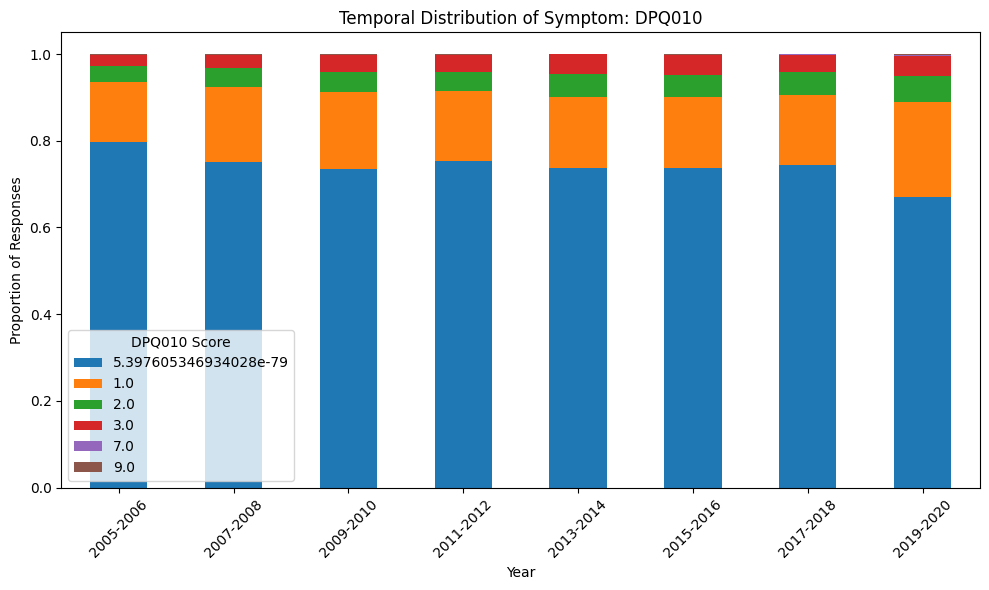

In [ ]:
import matplotlib.pyplot as plt

# Drop missing values for DPQ010
dpq_clean = dpq_all.dropna(subset=["DPQ010"])

# Group and calculate proportions
yearly_distribution = dpq_clean.groupby("Year")["DPQ010"].value_counts(normalize=True).unstack()

# Plot
yearly_distribution.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Temporal Distribution of Symptom: DPQ010")
plt.xlabel("Year")
plt.ylabel("Proportion of Responses")
plt.legend(title="DPQ010 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Only keep valid scores
dpq_clean = dpq_clean[dpq_clean["DPQ010"].isin([0, 1, 2, 3])]


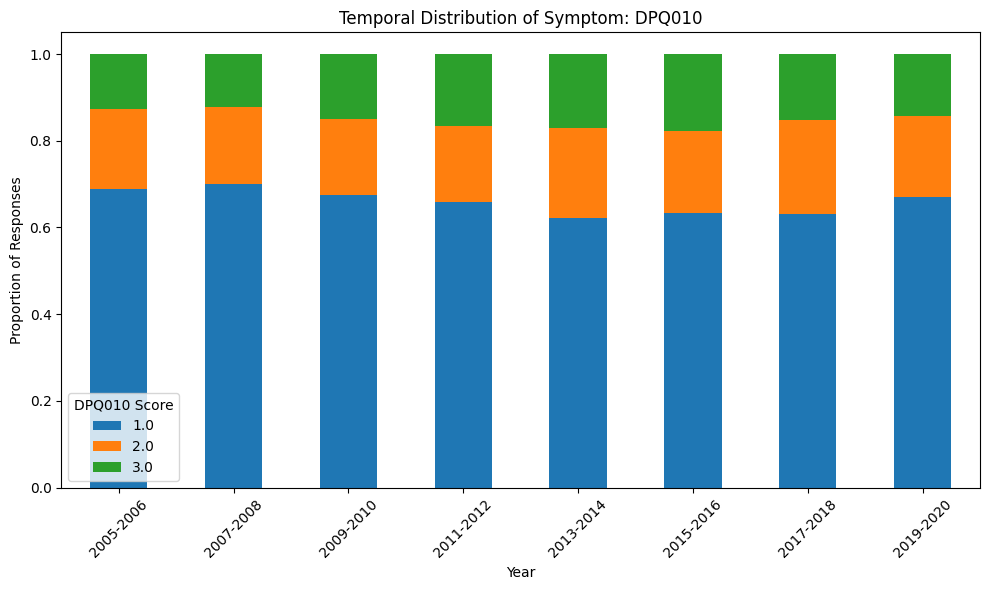

In [ ]:
yearly_distribution = dpq_clean.groupby("Year")["DPQ010"].value_counts(normalize=True).unstack()
yearly_distribution.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Temporal Distribution of Symptom: DPQ010")
plt.xlabel("Year")
plt.ylabel("Proportion of Responses")
plt.legend(title="DPQ010 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'phq9_cols' is not defined

In [ ]:
def map_symptom_level(val):
    if val == 0:
        return "None"
    elif val == 1:
        return "Mild"
    elif val in [2, 3]:
        return "Severe"
    else:
        return None  # For safety


In [ ]:
dpq_clean["DPQ010_Category"] = dpq_clean["DPQ010"].apply(map_symptom_level)


In [ ]:
phq9_cols = [f"DPQ0{i}" for i in range(10, 100, 10)]


In [ ]:
# Define PHQ-9 columns
phq9_cols = [f"DPQ0{i}" for i in range(10, 100, 10)]

# Apply symptom category mapping to each
for col in phq9_cols:
    dpq_clean[col + "_Category"] = dpq_clean[col].apply(map_symptom_level)


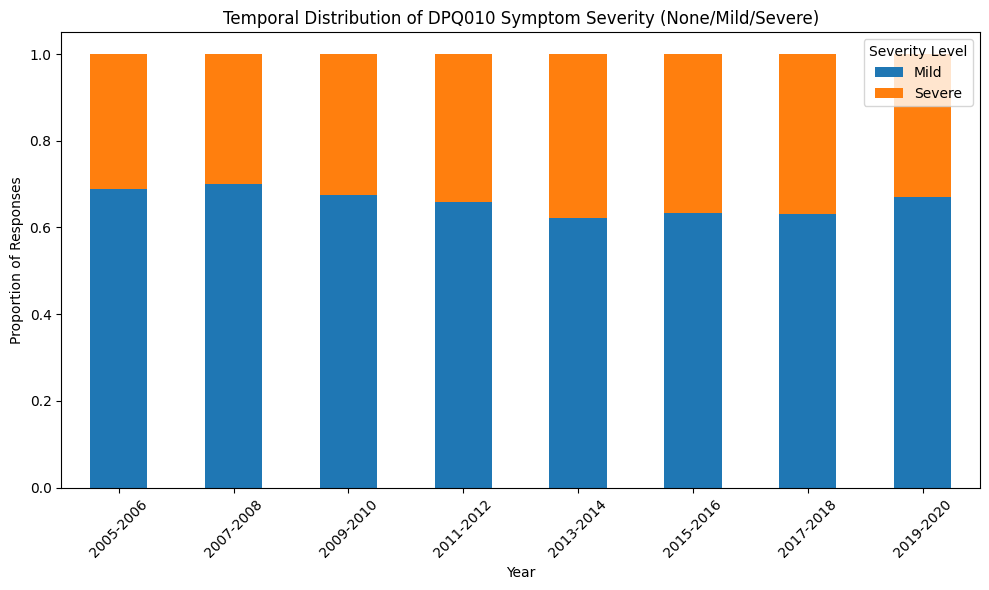

In [ ]:
# Group by Year and Category
symptom_dist = dpq_clean.groupby("Year")["DPQ010_Category"].value_counts(normalize=True).unstack()

# Plot
symptom_dist.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Temporal Distribution of DPQ010 Symptom Severity (None/Mild/Severe)")
plt.xlabel("Year")
plt.ylabel("Proportion of Responses")
plt.legend(title="Severity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def map_symptom_level(val):
    if val == 0:
        return "None"
    elif val == 1:
        return "Mild"
    elif val in [2, 3]:
        return "Severe"
    else:
        return "Invalid"  # Catch weird values


In [ ]:
print(dpq_clean["DPQ010_Category"].value_counts())


DPQ010_Category
Mild      7156
Severe    3696
Name: count, dtype: int64


In [ ]:
# Recreate dpq_clean from dpq_all with all valid responses
dpq_clean = dpq_all.copy()
dpq_clean = dpq_clean[dpq_clean["DPQ010"].isin([0, 1, 2, 3])]


In [ ]:
def map_symptom_level(val):
    if val == 0:
        return "None"
    elif val == 1:
        return "Mild"
    elif val in [2, 3]:
        return "Severe"
    else:
        return "Invalid"

dpq_clean["DPQ010_Category"] = dpq_clean["DPQ010"].apply(map_symptom_level)


In [ ]:
print(dpq_clean["DPQ010_Category"].value_counts())


DPQ010_Category
Mild      7156
Severe    3696
Name: count, dtype: int64


In [ ]:
dpq_clean = dpq_clean[dpq_clean["DPQ020"].isin([0, 1, 2, 3])]


In [ ]:
dpq_clean["DPQ020_Category"] = dpq_clean["DPQ020"].apply(map_symptom_level)


In [ ]:
order = ["None", "Mild", "Severe"]

symptom_dist_020 = dpq_clean.groupby("Year")["DPQ020_Category"] \
                            .value_counts(normalize=True) \
                            .unstack().fillna(0)[order]

symptom_dist_020.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Temporal Distribution of DPQ020 Symptom Severity (None/Mild/Severe)")
plt.xlabel("Year")
plt.ylabel("Proportion of Responses")
plt.legend(title="Severity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



KeyError: "['None'] not in index"

In [ ]:
dpq_clean = dpq_all.copy()
dpq_clean = dpq_clean[dpq_clean["DPQ020"].isin([0, 1, 2, 3])]


In [ ]:
symptom_dist_raw = dpq_clean.groupby("Year")["DPQ020"] \
                            .value_counts(normalize=True) \
                            .unstack().fillna(0)


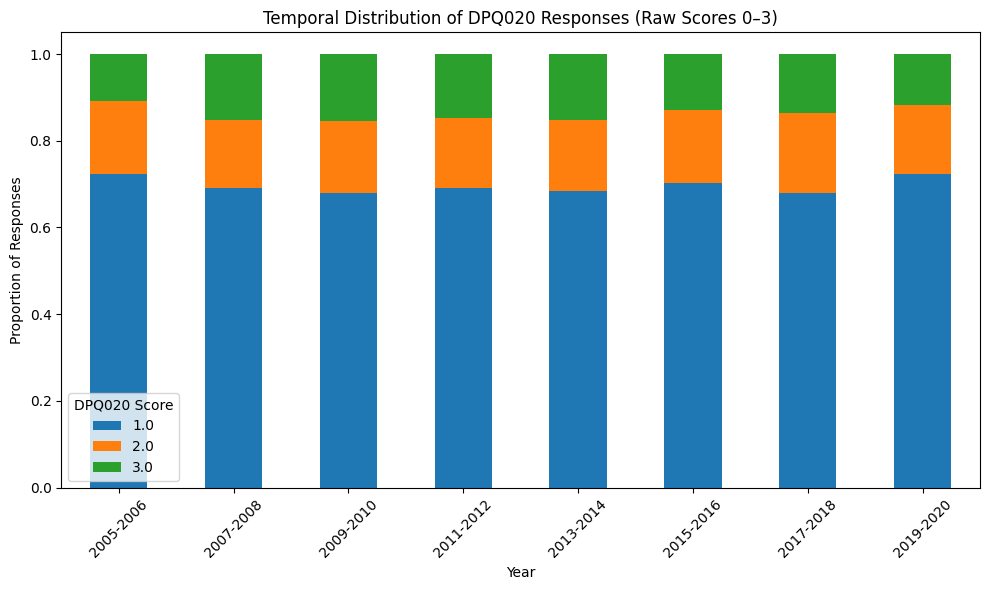

In [ ]:
symptom_dist_raw.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Temporal Distribution of DPQ020 Responses (Raw Scores 0–3)")
plt.xlabel("Year")
plt.ylabel("Proportion of Responses")
plt.legend(title="DPQ020 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# STEP 1: Define PHQ-9 depression symptom columns
phq9_cols = [f"DPQ0{i}" for i in range(10, 100, 10)]

# STEP 2: Filter only rows with valid (0–3) values for all symptoms
dpq_clean = dpq_all.copy()
for col in phq9_cols:
    dpq_clean = dpq_clean[dpq_clean[col].isin([0, 1, 2, 3])]

# STEP 3: Plot temporal distribution for each DPQ column
for col in phq9_cols:
    # Group by Year and DPQ score
    dist = dpq_clean.groupby("Year")[col] \
                    .value_counts(normalize=True) \
                    .unstack().fillna(0)

    # Sort columns 0–3 for consistent legend
  # Only reorder if all values are present
  available = [c for c in [0, 1, 2, 3] if c in dist.columns]
  dist = dist[available]


    # Plot
    dist.plot(kind="bar", stacked=True, figsize=(10,6))
    plt.title(f"Temporal Distribution of {col} (Raw Scores 0–3)")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Responses")
    plt.legend(title=f"{col} Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

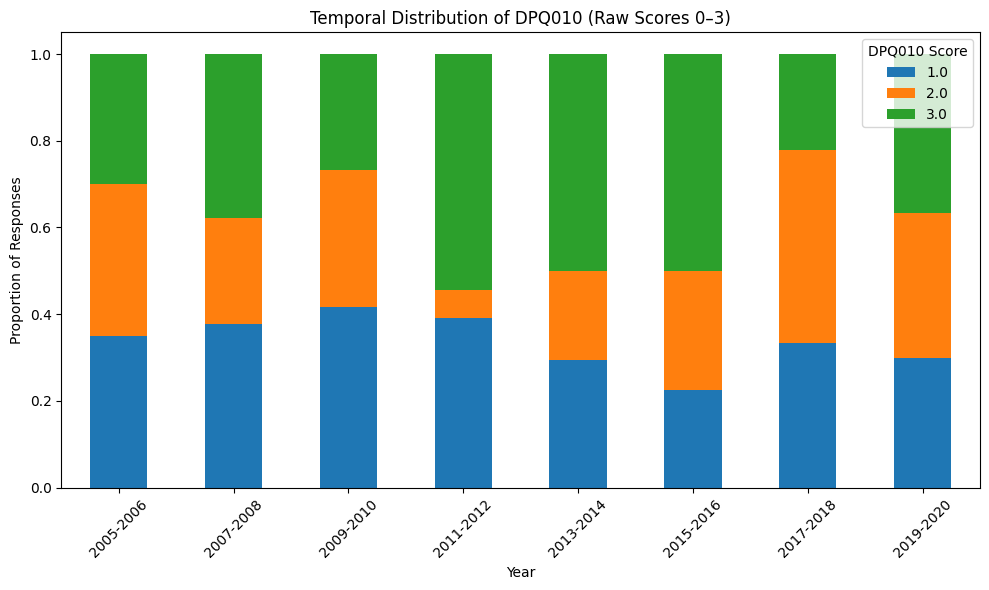

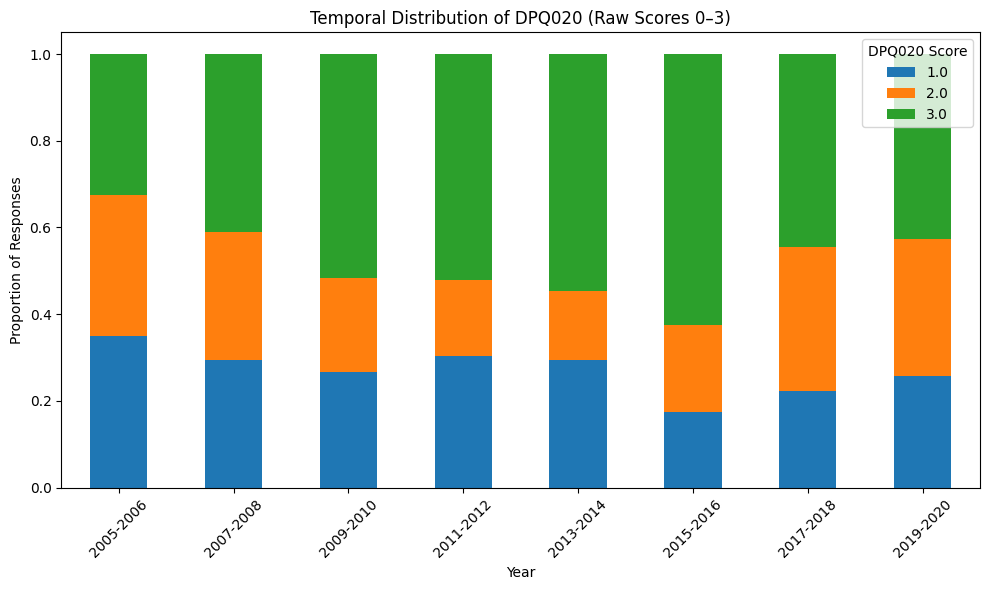

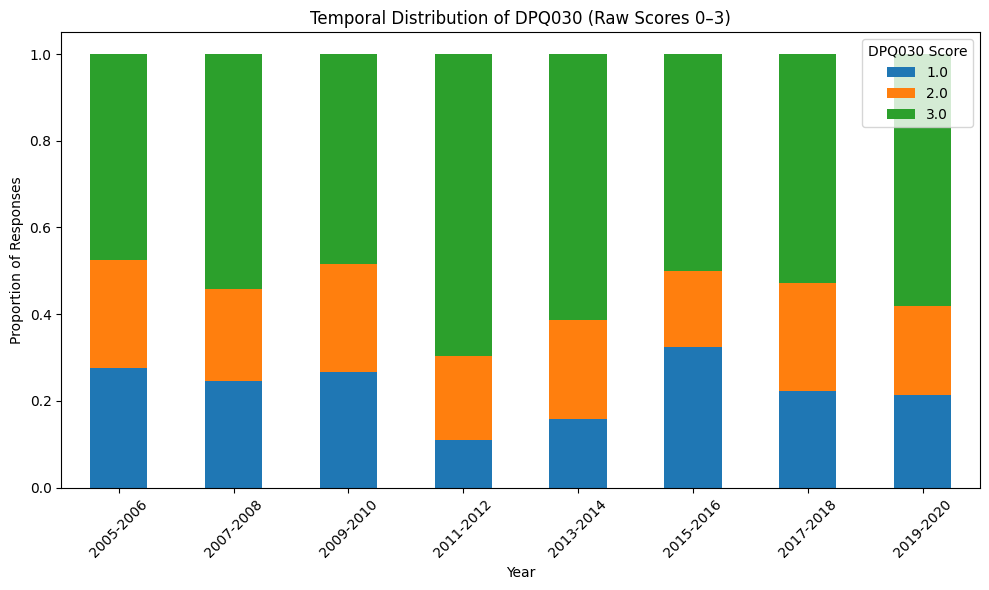

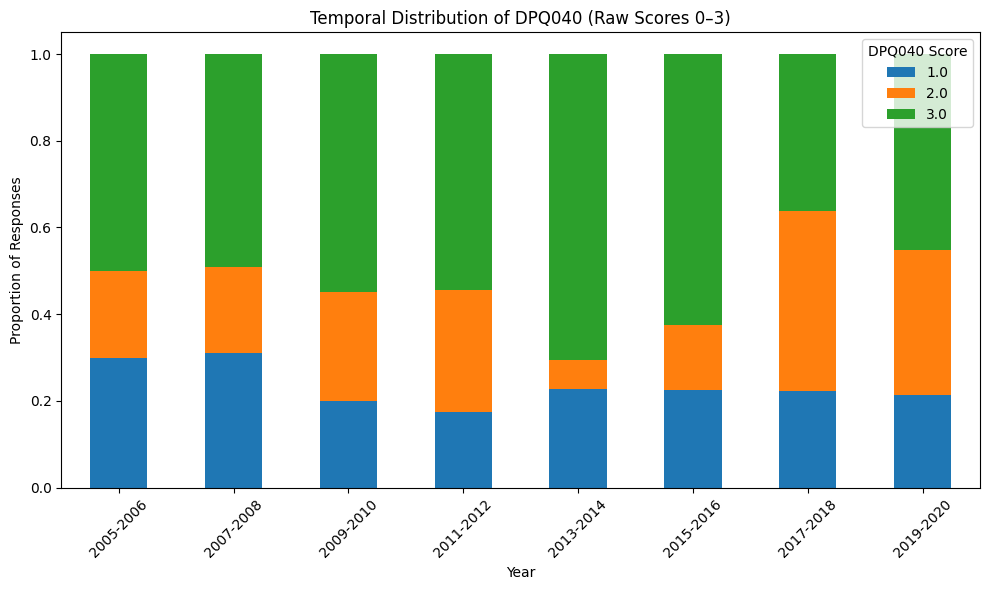

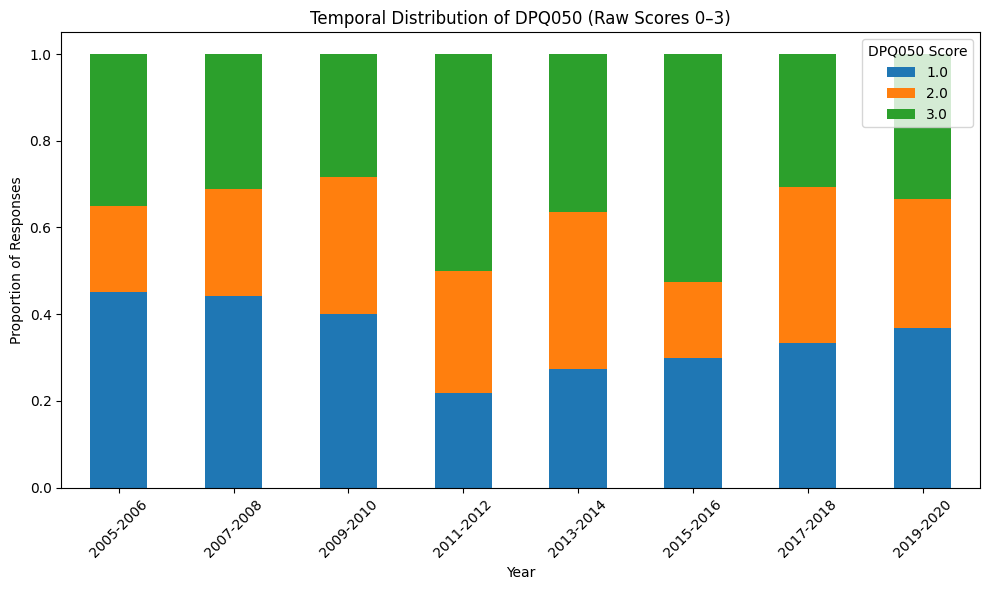

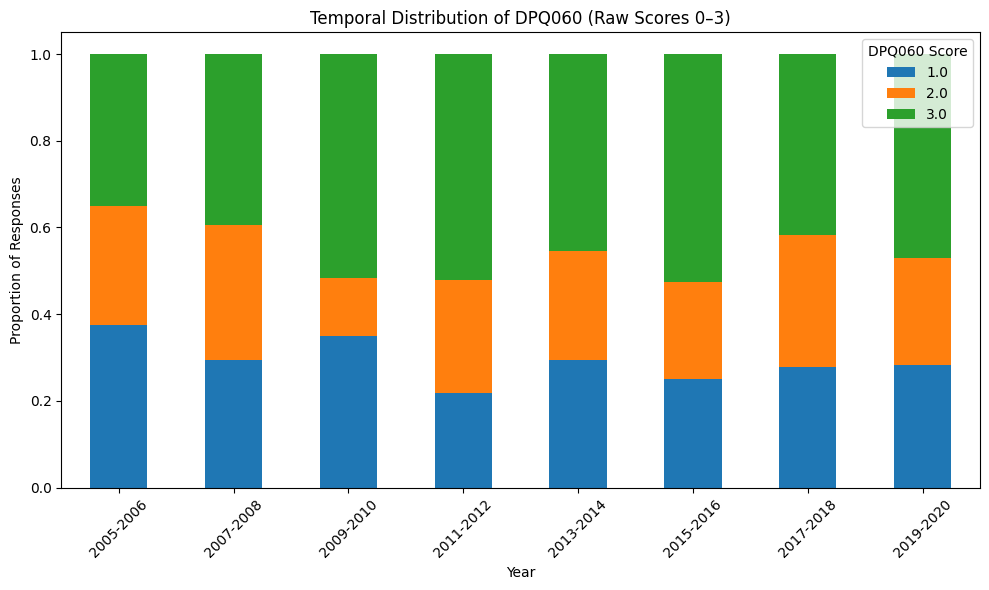

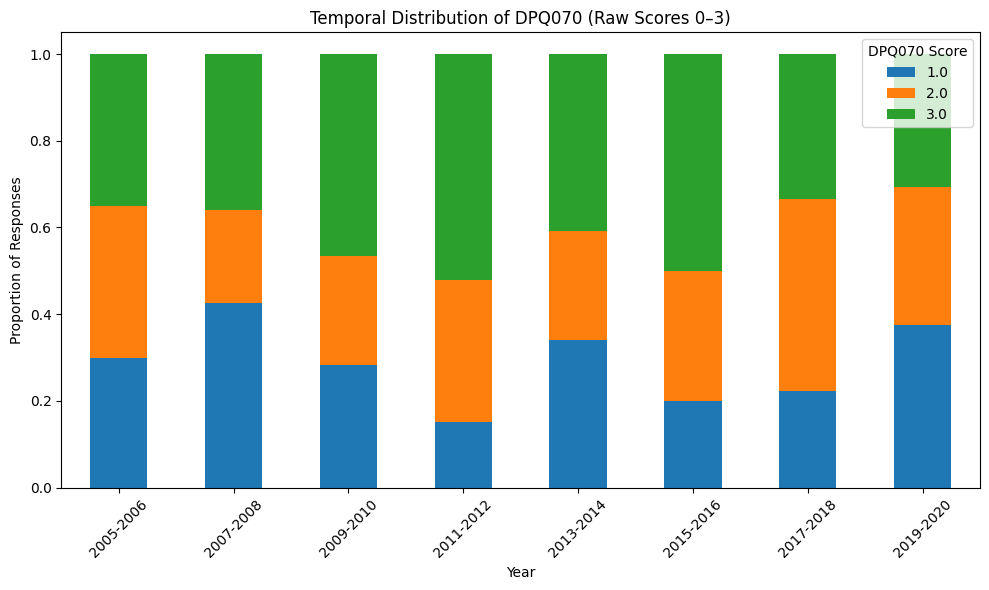

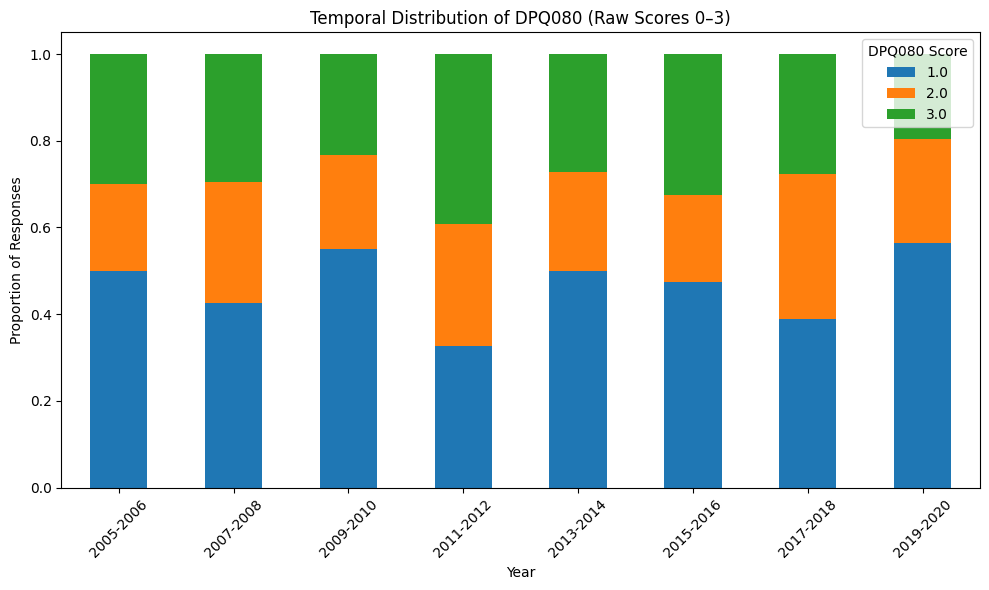

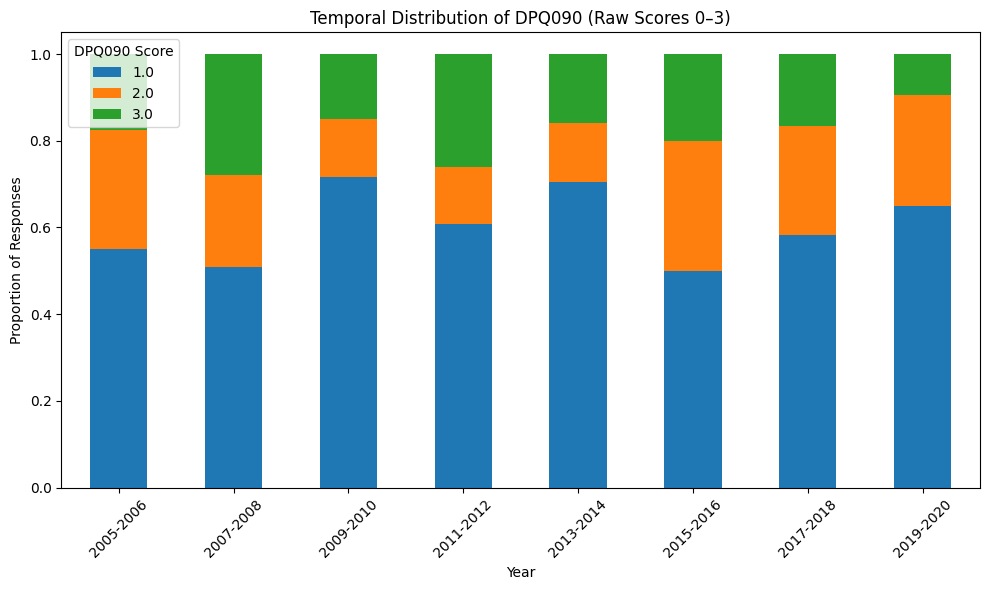

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# STEP 1: Define PHQ-9 depression symptom columns
phq9_cols = [f"DPQ0{i}" for i in range(10, 100, 10)]

# STEP 2: Filter only rows with valid (0–3) values for all symptoms
dpq_clean = dpq_all.copy()
for col in phq9_cols:
    dpq_clean = dpq_clean[dpq_clean[col].isin([0, 1, 2, 3])]

# STEP 3: Plot temporal distribution for each DPQ column
for col in phq9_cols:
    # Group by Year and DPQ score
    dist = dpq_clean.groupby("Year")[col] \
                    .value_counts(normalize=True) \
                    .unstack().fillna(0)

    # Sort columns 0–3 for consistent legend (only if present)
    available = [c for c in [0, 1, 2, 3] if c in dist.columns]
    dist = dist[available]

    # Plot
    dist.plot(kind="bar", stacked=True, figsize=(10,6))
    plt.title(f"Temporal Distribution of {col} (Raw Scores 0–3)")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Responses")
    plt.legend(title=f"{col} Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


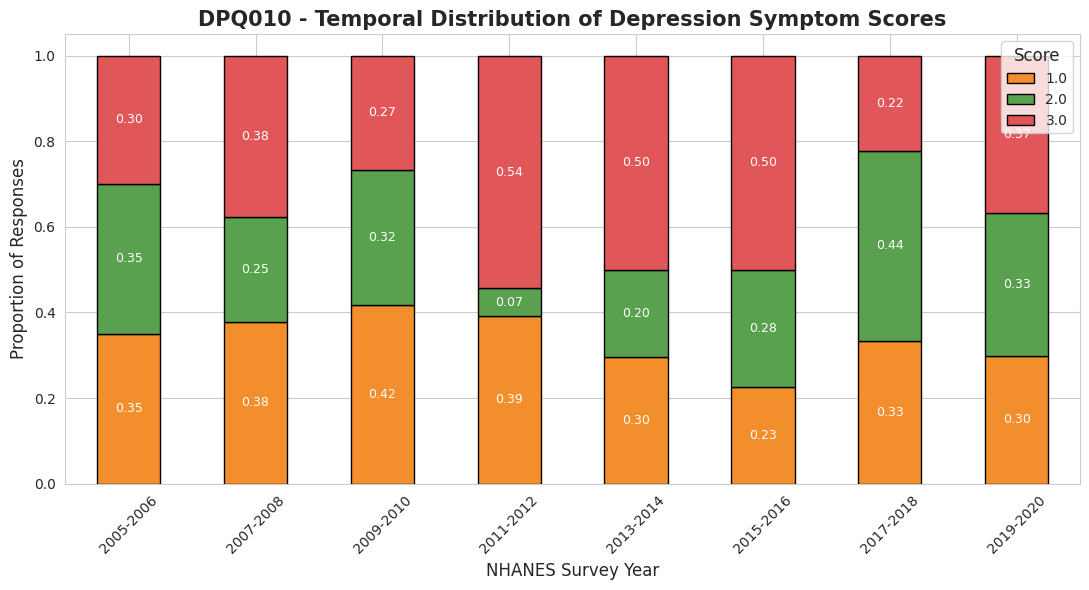

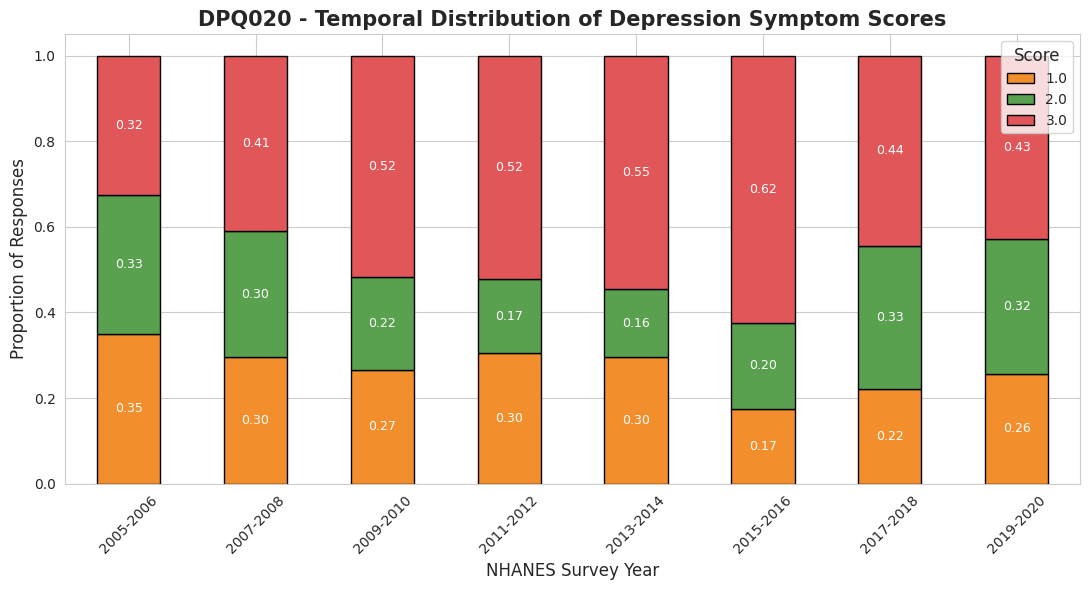

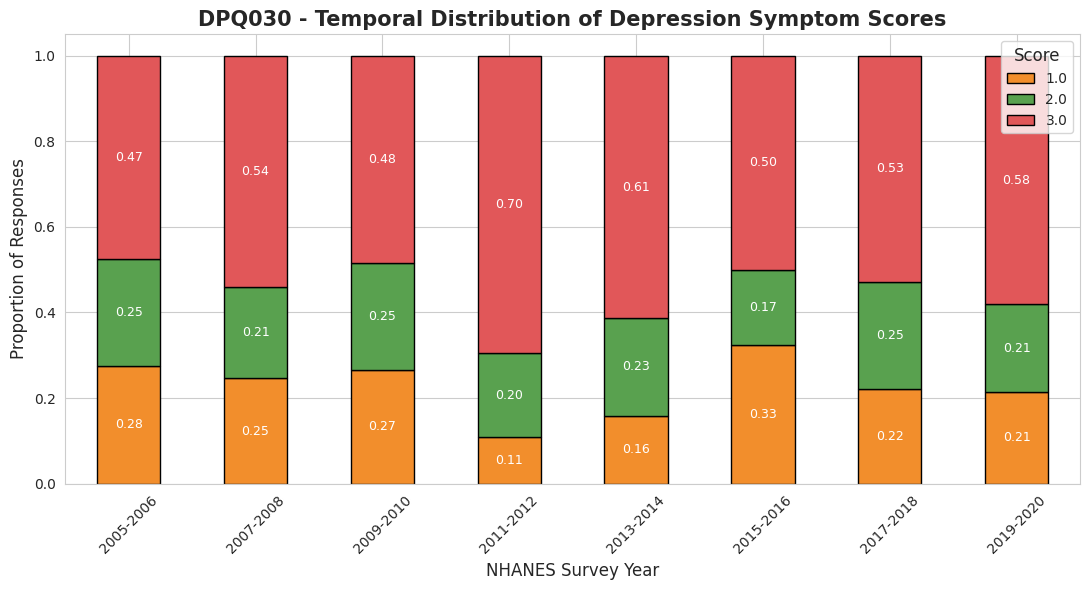

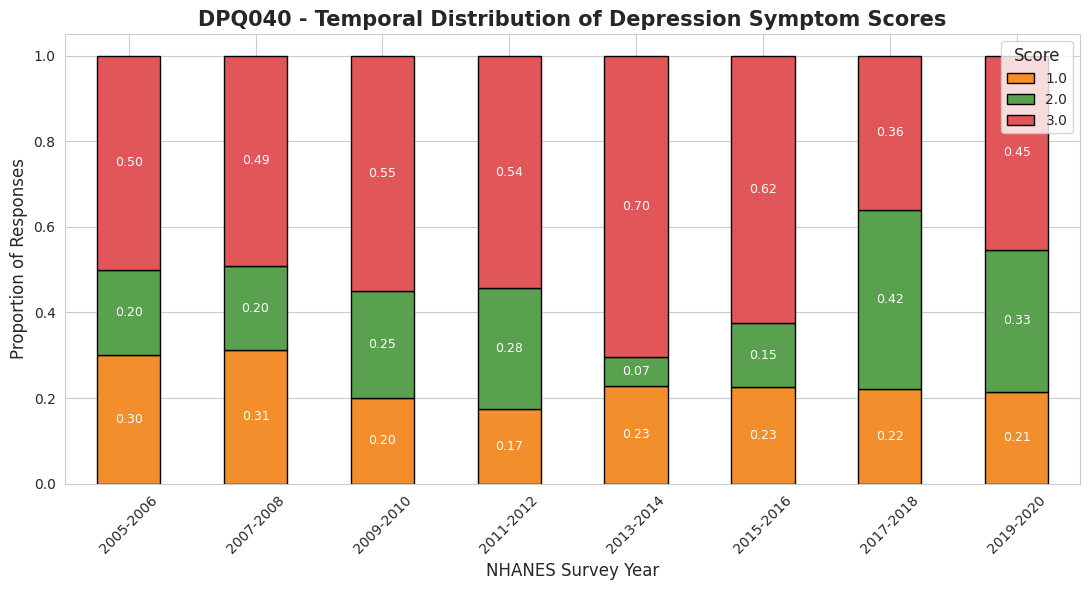

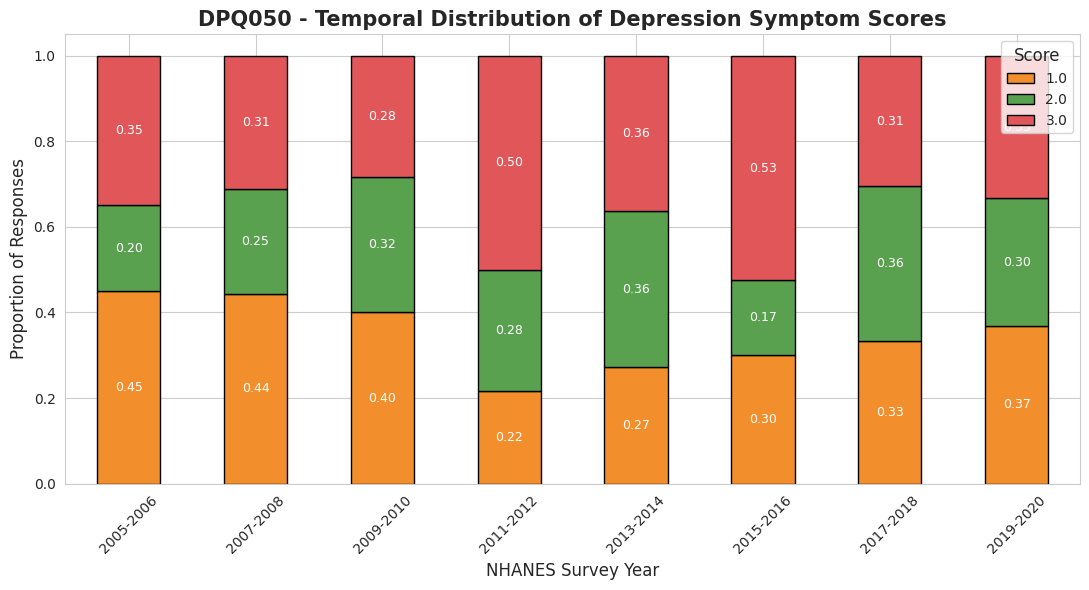

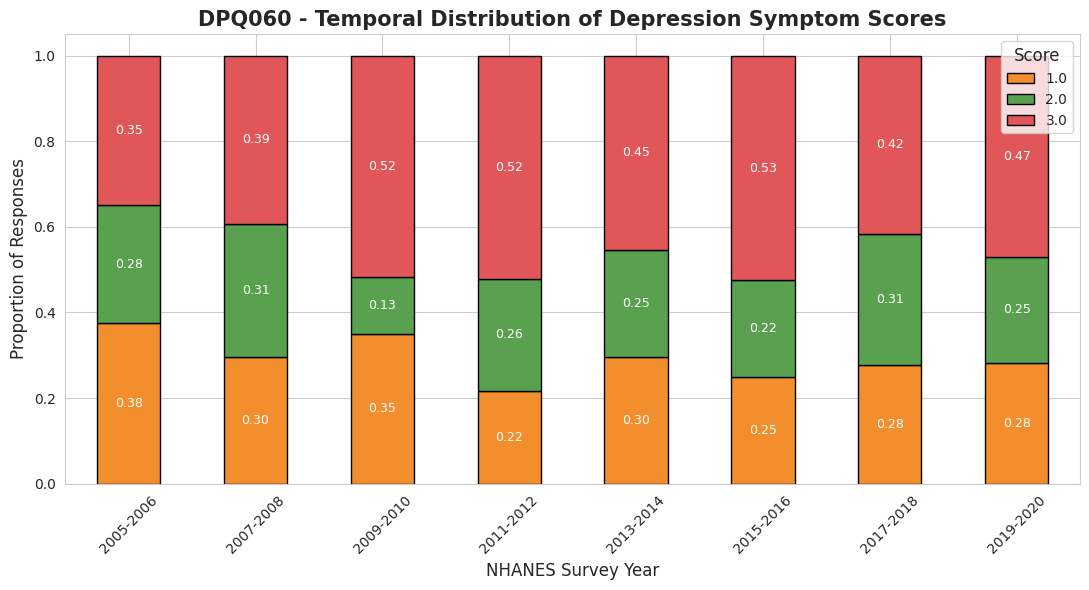

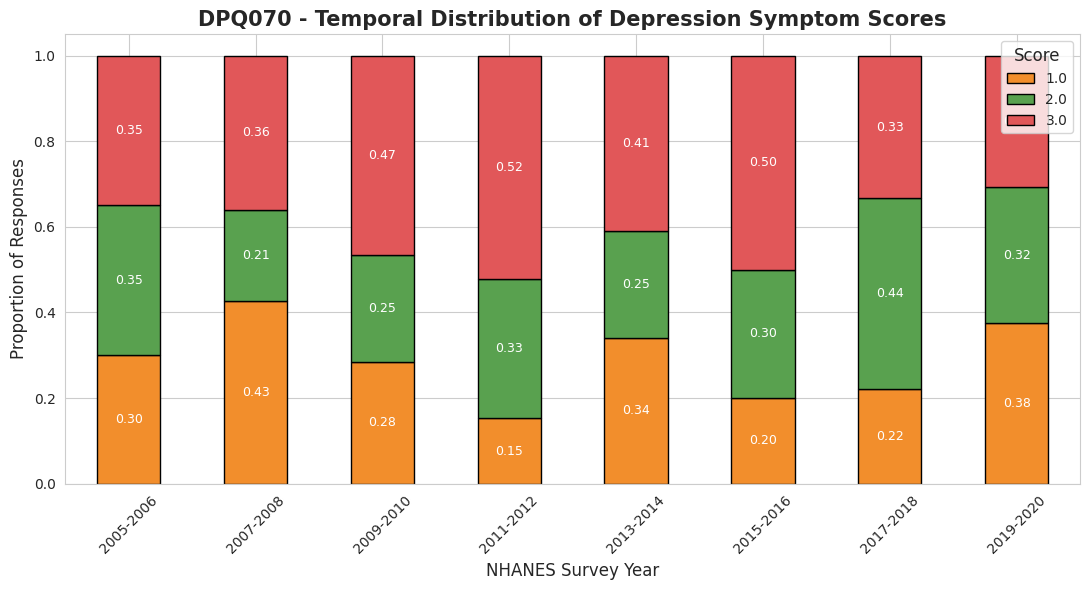

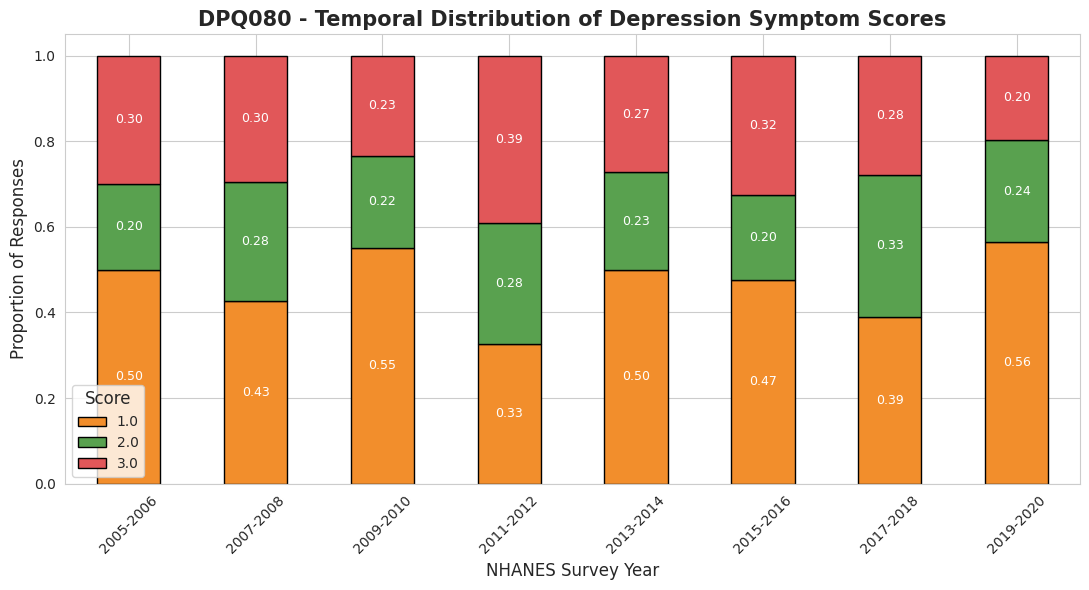

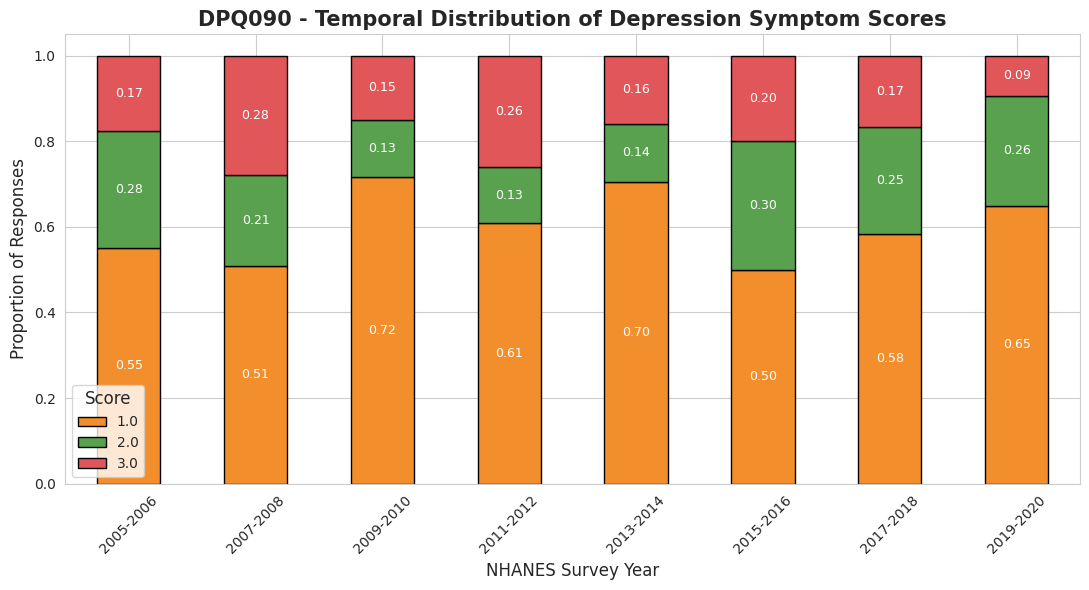

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")  # Cleaner background

# Color palette: Blue, Orange, Green, Red for scores 0–3
color_map = {0: "#4e79a7", 1: "#f28e2c", 2: "#59a14f", 3: "#e15759"}

for col in phq9_cols:
    dist = dpq_clean.groupby("Year")[col] \
                    .value_counts(normalize=True) \
                    .unstack().fillna(0)

    # Order scores that exist
    available = [c for c in [0, 1, 2, 3] if c in dist.columns]
    dist = dist[available]

    # Plot with custom colors
    ax = dist.plot(kind="bar", stacked=True, figsize=(11, 6),
                   color=[color_map[c] for c in available], edgecolor='black')

    # Title and labels
    plt.title(f"{col} - Temporal Distribution of Depression Symptom Scores", fontsize=15, weight='bold')
    plt.xlabel("NHANES Survey Year", fontsize=12)
    plt.ylabel("Proportion of Responses", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Score", title_fontsize=12)
    plt.tight_layout()

    # Optional: Annotate bar segments with values
    for p in ax.patches:
        height = p.get_height()
        if height > 0.04:  # Only annotate if it's big enough
            ax.annotate(f'{height:.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha='center', va='center', fontsize=9, color='white')

    plt.show()


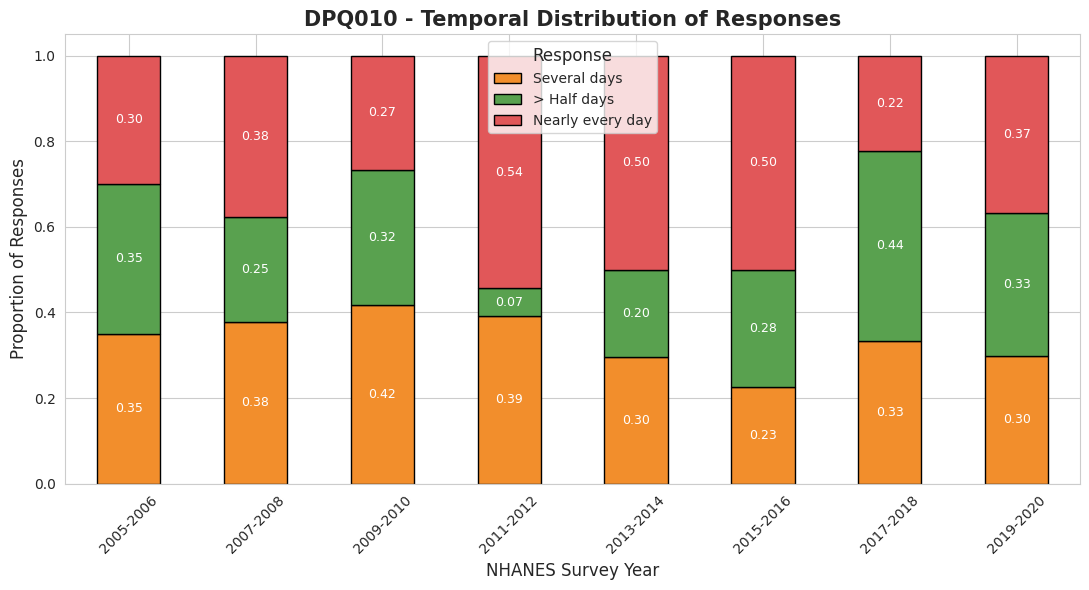

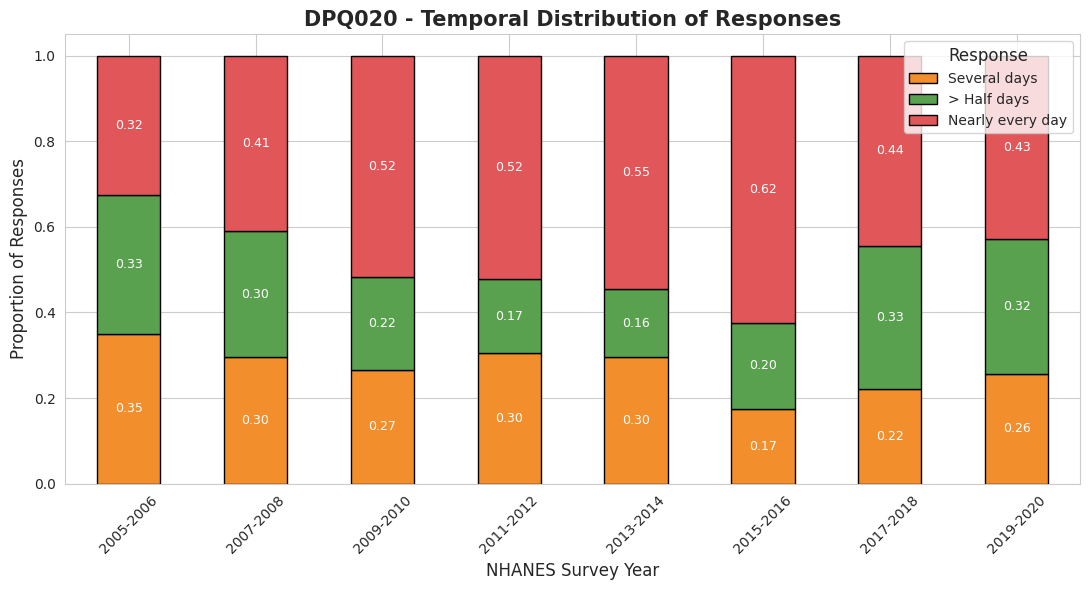

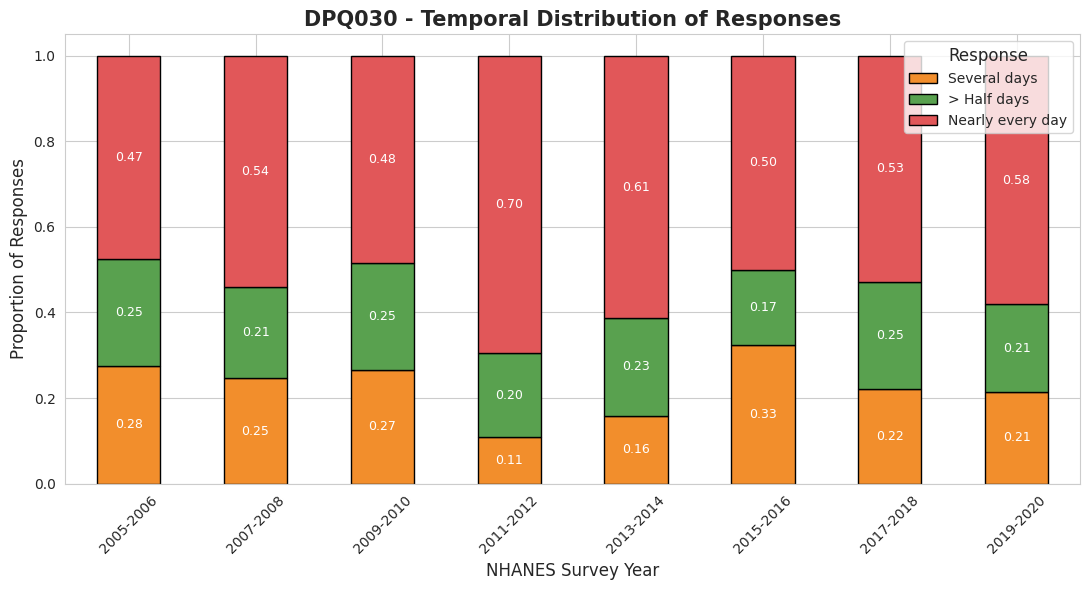

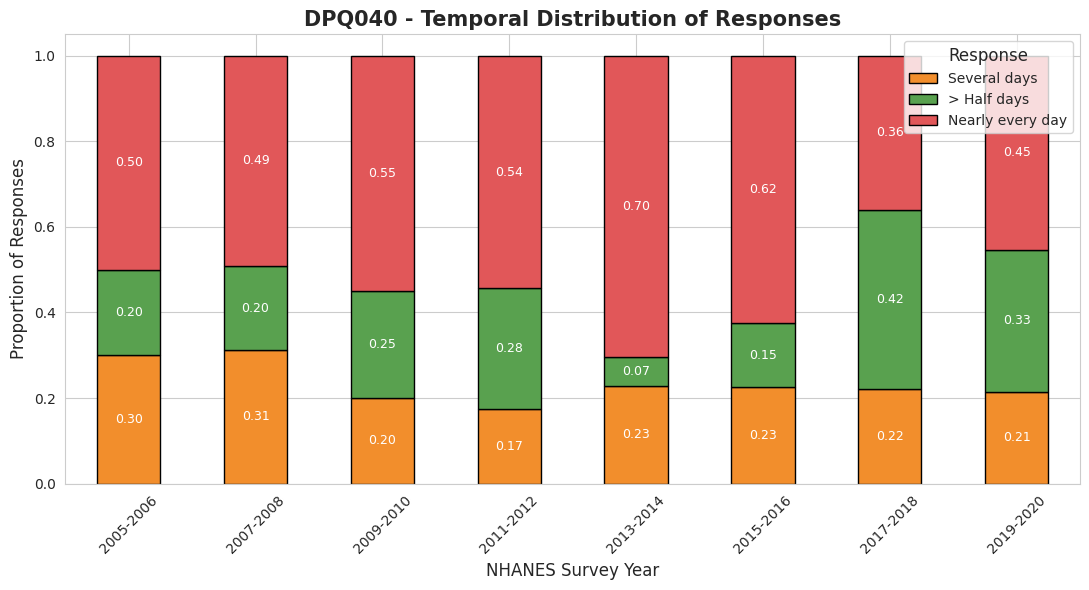

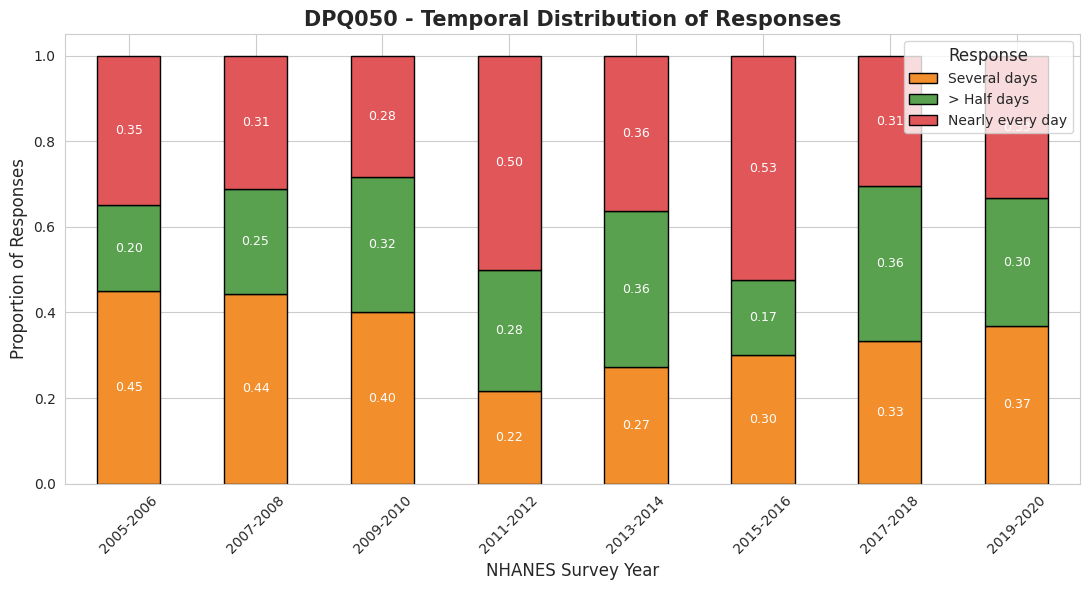

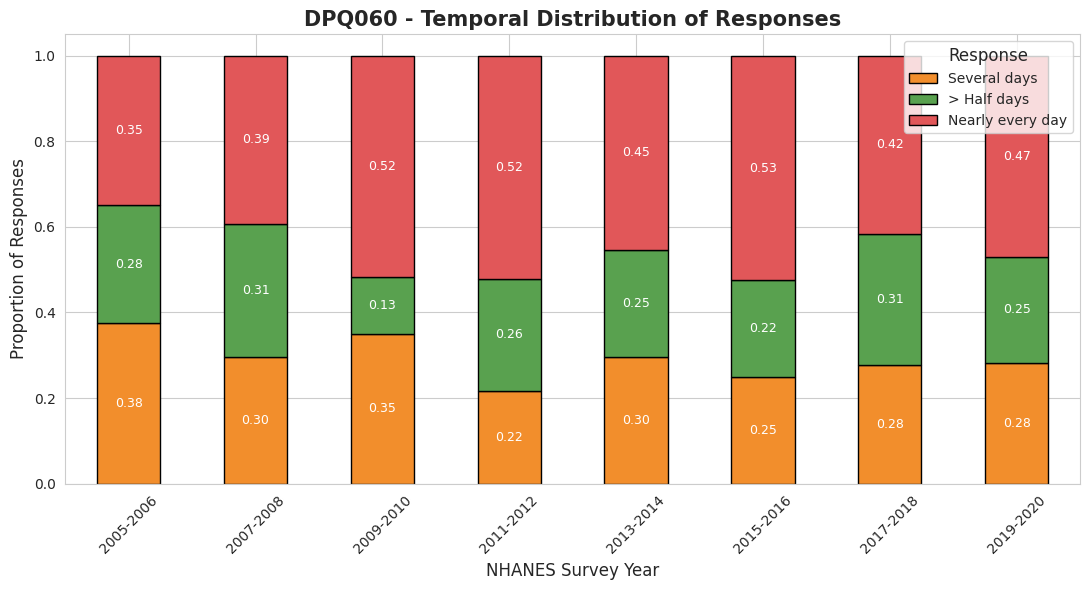

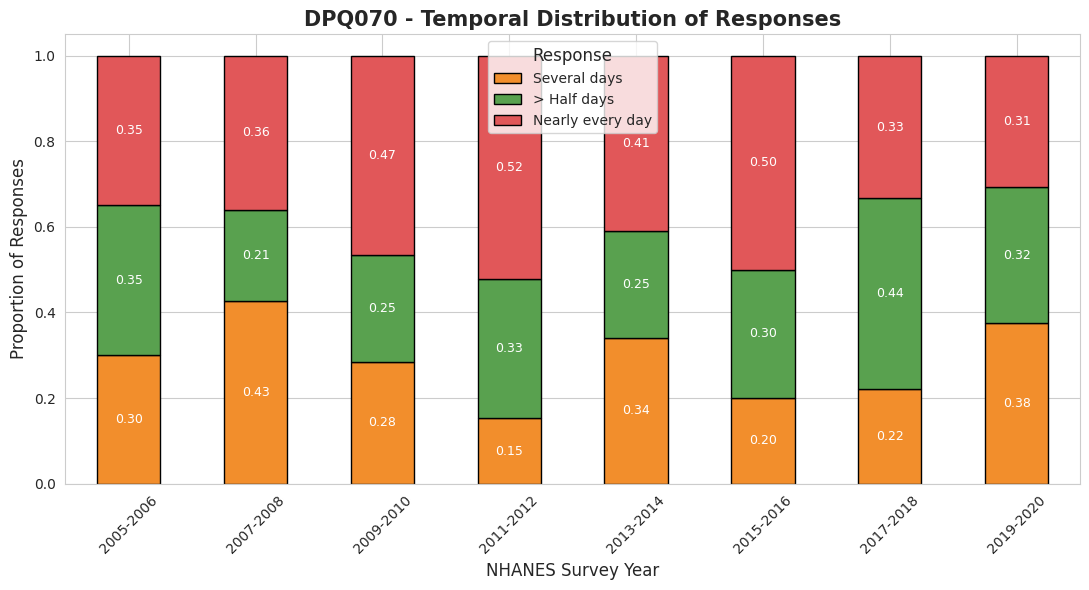

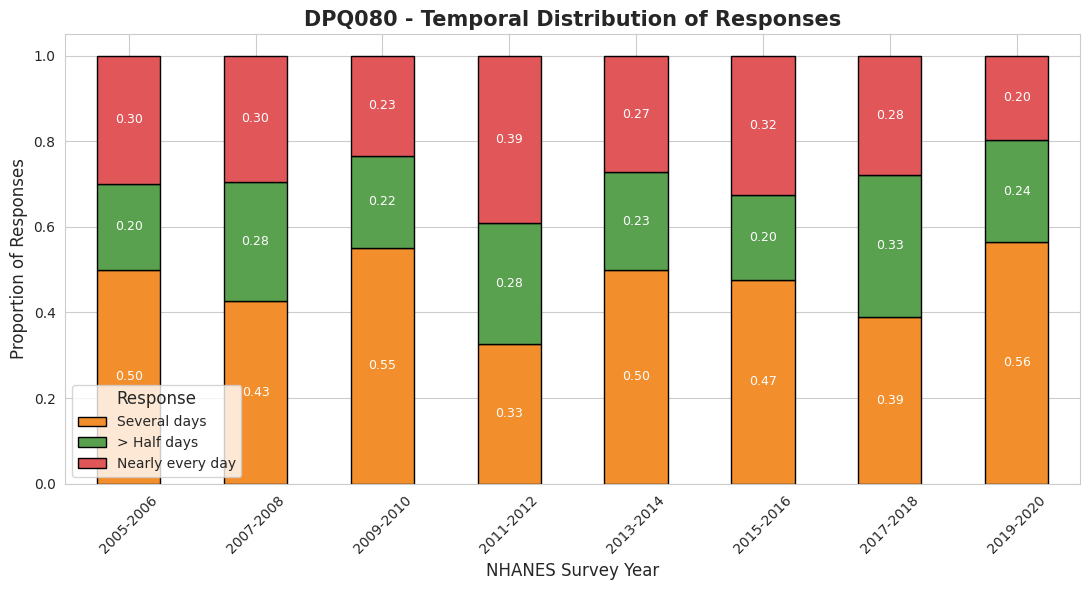

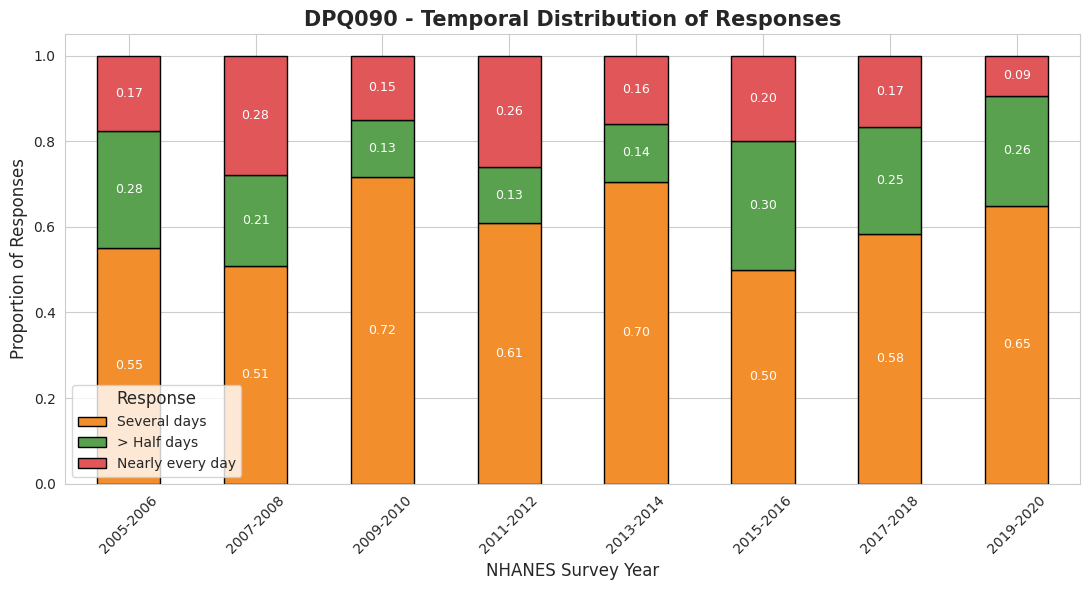

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

# Score to label mapping
score_labels = {
    0: "Not at all",
    1: "Several days",
    2: "> Half days",
    3: "Nearly every day"
}

# Custom colors for labels
color_map = {
    "Not at all": "#4e79a7",
    "Several days": "#f28e2c",
    "> Half days": "#59a14f",
    "Nearly every day": "#e15759"
}

for col in phq9_cols:
    # Group and normalize
    dist = dpq_clean.groupby("Year")[col] \
                    .value_counts(normalize=True) \
                    .unstack().fillna(0)

    # Rename columns (scores) to labels
    dist.rename(columns=score_labels, inplace=True)

    # Order only available labels
    ordered_labels = [score_labels[s] for s in [0, 1, 2, 3] if score_labels[s] in dist.columns]
    dist = dist[ordered_labels]

    # Plot
    ax = dist.plot(kind="bar", stacked=True, figsize=(11, 6),
                   color=[color_map[lbl] for lbl in ordered_labels], edgecolor='black')

    # Labels and styling
    plt.title(f"{col} - Temporal Distribution of Responses", fontsize=15, weight='bold')
    plt.xlabel("NHANES Survey Year", fontsize=12)
    plt.ylabel("Proportion of Responses", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Response", title_fontsize=12)
    plt.tight_layout()

    # Optional: Annotate proportions
    for p in ax.patches:
        height = p.get_height()
        if height > 0.04:
            ax.annotate(f'{height:.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha='center', va='center', fontsize=9, color='white')

    plt.show()


In [ ]:
import pandas as pd
import os

# Define year suffix map
year_map = {
    "_D": "2005-2006", "_E": "2007-2008", "_F": "2009-2010",
    "_G": "2011-2012", "_H": "2013-2014", "_I": "2015-2016",
    "_J": "2017-2018", "_L": "2019-2020"
}

all_dfs = []
for root, dirs, files in os.walk("imputated_data"):
    for file in files:
        if file.startswith("DPQ_") and file.endswith(".xpt"):
            suffix = '_' + file.split('_')[-1].split('.')[0]
            year = year_map.get(suffix, "Unknown")
            path = os.path.join(root, file)
            df = pd.read_sas(path)
            df["Year"] = year
            all_dfs.append(df)

dpq_all = pd.concat(all_dfs, ignore_index=True)



In [ ]:
print(dpq_all.columns)


Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'Year'],
      dtype='object')


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving DEMO_D.xpt to DEMO_D.xpt
Saving DEMO_E.xpt to DEMO_E.xpt
Saving DEMO_F.xpt to DEMO_F.xpt
Saving DEMO_G.xpt to DEMO_G.xpt
Saving DEMO_H.xpt to DEMO_H.xpt
Saving DEMO_I.xpt to DEMO_I.xpt
Saving DEMO_J.xpt to DEMO_J.xpt
Saving DEMO_L.xpt to DEMO_L.xpt
Saving P_DEMO.xpt to P_DEMO.xpt


In [ ]:
import pandas as pd

# Year mapping
year_map = {
    "_D": "2005-2006", "_E": "2007-2008", "_F": "2009-2010",
    "_G": "2011-2012", "_H": "2013-2014", "_I": "2015-2016",
    "_J": "2017-2018", "_L": "2019-2020"
}

# Load and combine all DEMO files
demo_all = []

for suffix, year in year_map.items():
    filename = f"DEMO{suffix}.xpt"
    try:
        df = pd.read_sas(filename)
        df["Year"] = year
        demo_all.append(df)
    except Exception as e:
        print(f"Skipping {filename}: {e}")

demo_all = pd.concat(demo_all, ignore_index=True)


In [ ]:
merged = pd.merge(dpq_all, demo_all, on=["SEQN", "Year"], how="inner")


In [ ]:
# Gender mapping
merged["Gender"] = merged["RIAGENDR"].map({1: "Male", 2: "Female"})

# Race mapping
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race/Multi"
}
merged["Race"] = merged["RIDRETH1"].map(race_map)


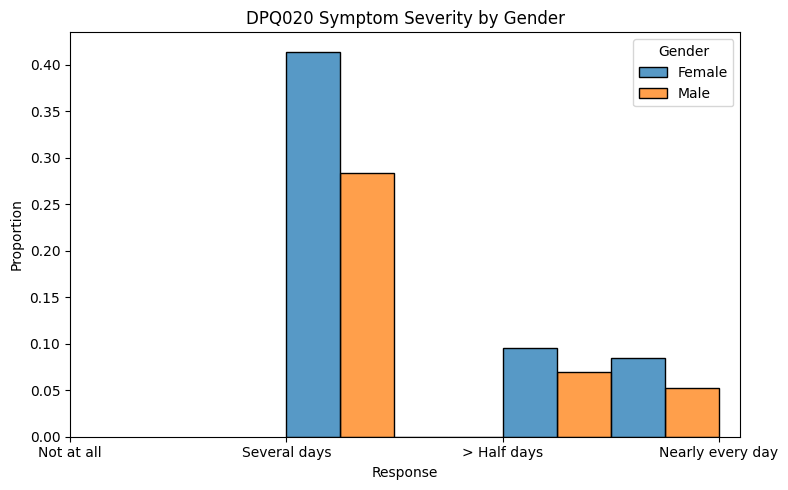

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid responses
bias_df = merged[merged["DPQ020"].isin([0, 1, 2, 3])]

plt.figure(figsize=(8, 5))
sns.histplot(data=bias_df, x="DPQ020", hue="Gender", multiple="dodge", stat="probability", bins=4)
plt.xticks([0, 1, 2, 3], ["Not at all", "Several days", "> Half days", "Nearly every day"])
plt.title("DPQ020 Symptom Severity by Gender")
plt.xlabel("Response")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


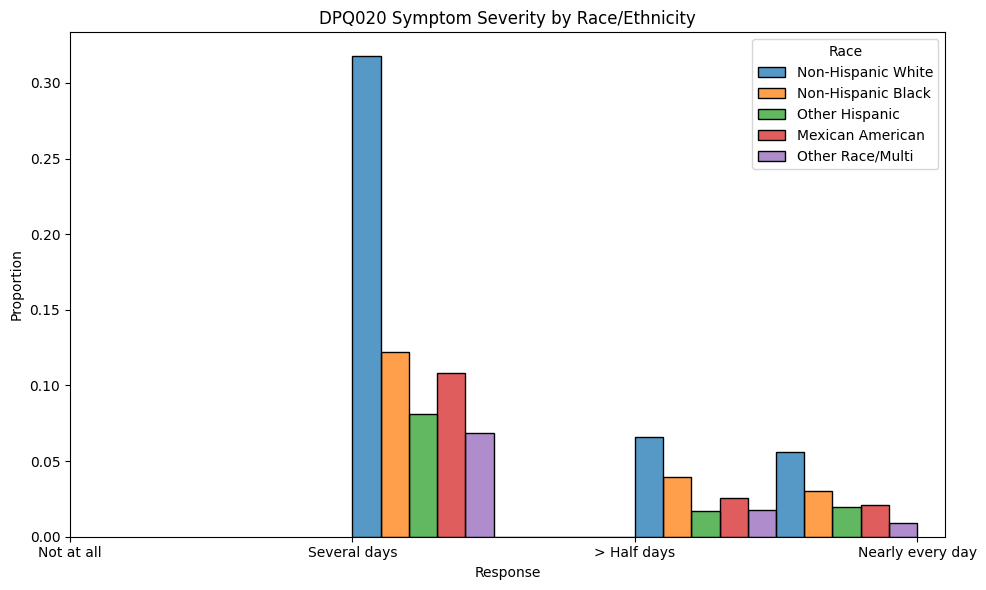

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bias_df, x="DPQ020", hue="Race", multiple="dodge", stat="probability", bins=4)
plt.xticks([0, 1, 2, 3], ["Not at all", "Several days", "> Half days", "Nearly every day"])
plt.title("DPQ020 Symptom Severity by Race/Ethnicity")
plt.xlabel("Response")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [ ]:
demo_all = pd.concat([...])


TypeError: cannot concatenate object of type '<class 'ellipsis'>'; only Series and DataFrame objs are valid

In [ ]:
# Gender mapping
demo_all["Gender"] = demo_all["RIAGENDR"].map({1: "Male", 2: "Female"})

# Race mapping
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race/Multi"
}
demo_all["Race"] = demo_all["RIDRETH1"].map(race_map)


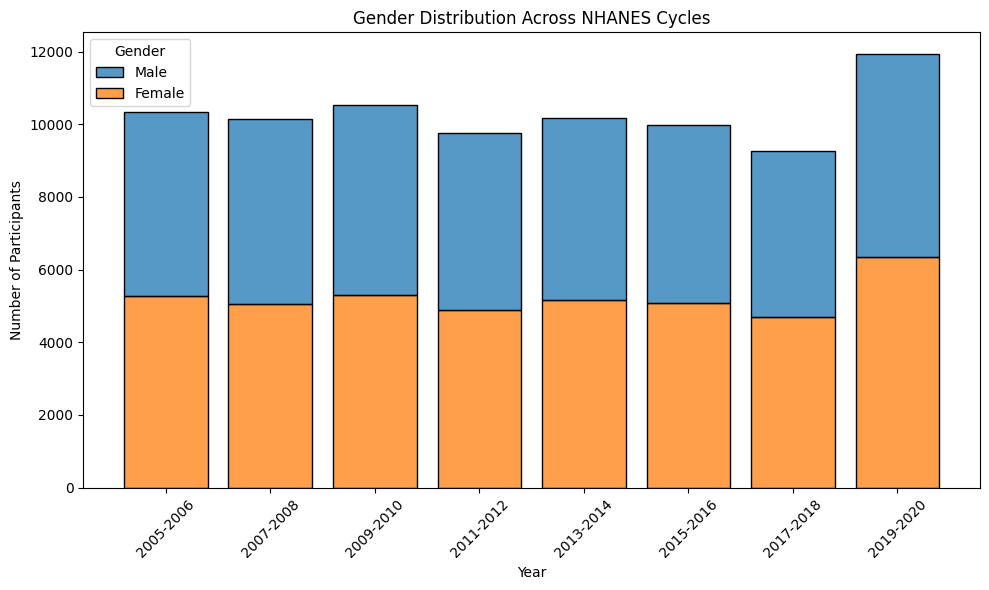

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=demo_all, x="Year", hue="Gender", multiple="stack", stat="count", shrink=0.8)
plt.title("Gender Distribution Across NHANES Cycles")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


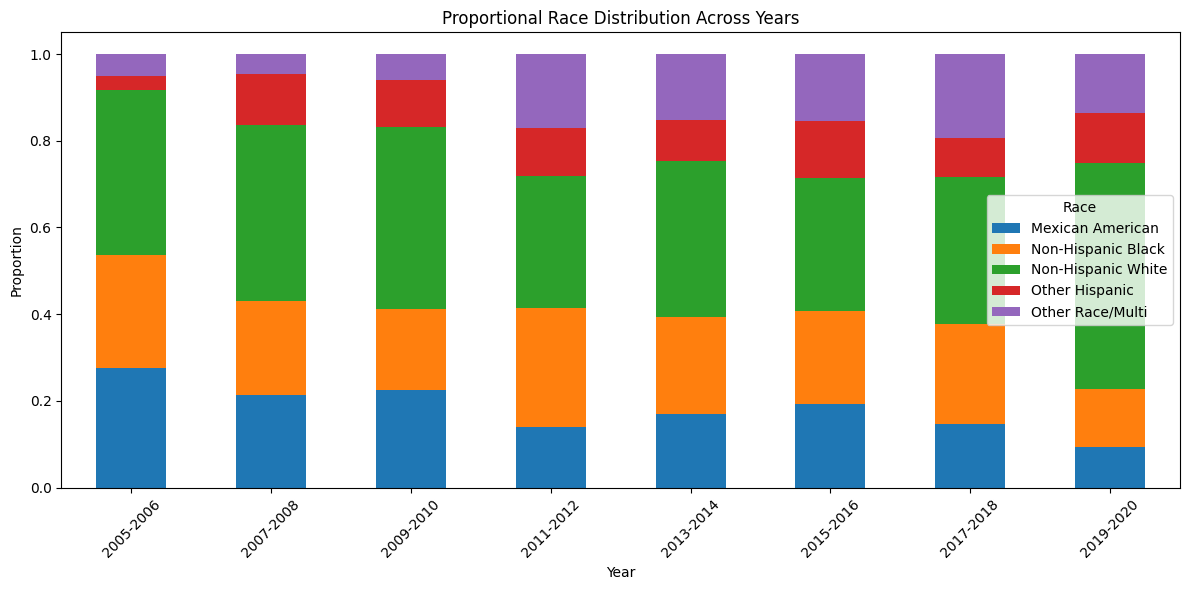

In [ ]:
race_dist = demo_all.groupby("Year")["Race"].value_counts(normalize=True).unstack()
race_dist.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Proportional Race Distribution Across Years")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


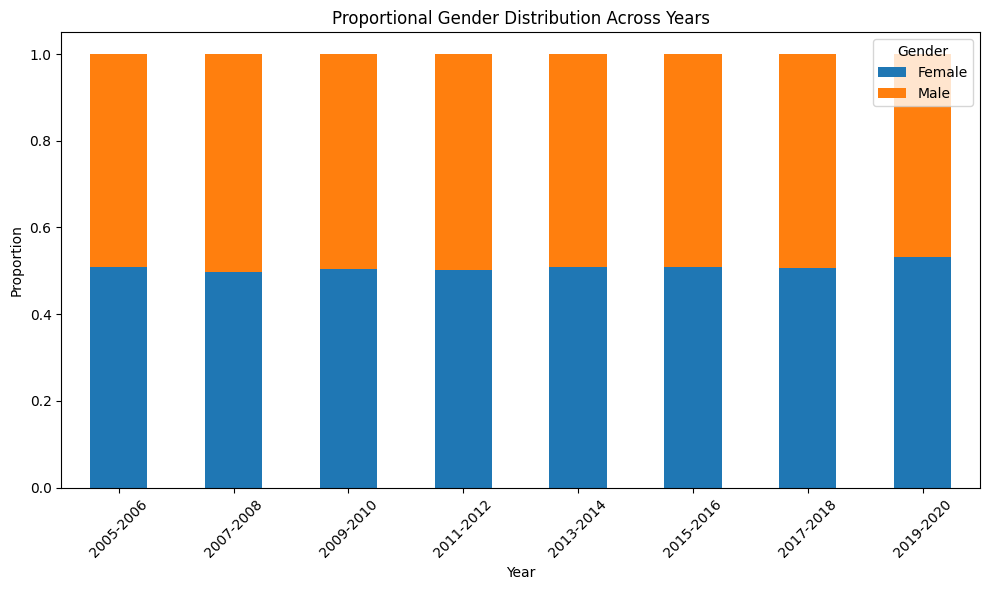

In [ ]:
gender_dist = demo_all.groupby("Year")["Gender"].value_counts(normalize=True).unstack()
gender_dist.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Proportional Gender Distribution Across Years")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


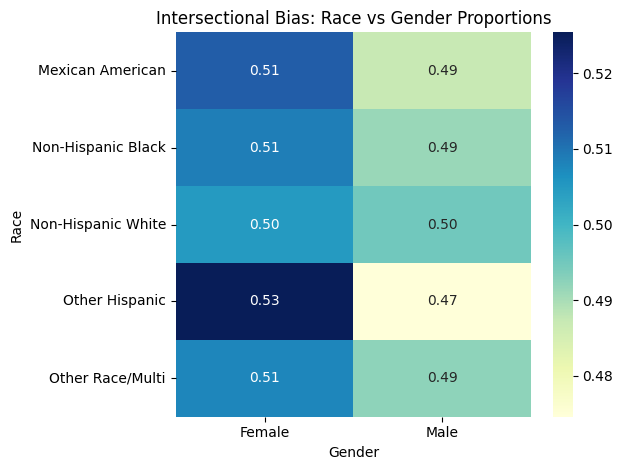

In [ ]:
pivot = demo_all.pivot_table(index="Race", columns="Gender", aggfunc="size", fill_value=0)
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0)  # Normalize

sns.heatmap(pivot_percentage, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Intersectional Bias: Race vs Gender Proportions")
plt.xlabel("Gender")
plt.ylabel("Race")
plt.tight_layout()
plt.show()


In [ ]:

import plotly.graph_objects as go

# Count flows from Race → Gender
race_gender = demo_all.groupby(['Race', 'Gender']).size().reset_index(name='count')

# Create unique node list
all_labels = list(race_gender['Race'].unique()) + list(race_gender['Gender'].unique())
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Build sankey input
source = race_gender['Race'].map(label_to_index)
target = race_gender['Gender'].map(label_to_index)
value = race_gender['count']

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=all_labels),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Race to Gender Flow (Sankey Diagram)", font_size=12)
fig.show()


In [ ]:
import plotly.express as px

df = demo_all.groupby(['Race', 'Gender']).size().reset_index(name='count')
fig = px.treemap(df, path=['Race', 'Gender'], values='count',
                 title='Race and Gender Representation Treemap')
fig.show()


In [ ]:
# Merge DPQ and DEMO datasets
merged = pd.merge(dpq_all, demo_all, on=["SEQN", "Year"], how="inner")

# Map Gender and Race
merged["Gender"] = merged["RIAGENDR"].map({1: "Male", 2: "Female"})

race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race/Multi"
}
merged["Race"] = merged["RIDRETH1"].map(race_map)


In [ ]:
# Only use rows where all DPQ010–DPQ090 values are 0–3
phq9_cols = [f"DPQ0{i}" for i in range(10, 100, 10)]

phq_df = merged.copy()
for col in phq9_cols:
    phq_df = phq_df[phq_df[col].isin([0, 1, 2, 3])]

phq_df["PHQ9_TOTAL"] = phq_df[phq9_cols].sum(axis=1)


In [ ]:
def simplify_phq9(score):
    if score <= 4:
        return "None"
    elif score <= 14:
        return "Mild"
    else:
        return "Severe"

phq_df["PHQ9_Level"] = phq_df["PHQ9_TOTAL"].apply(simplify_phq9)


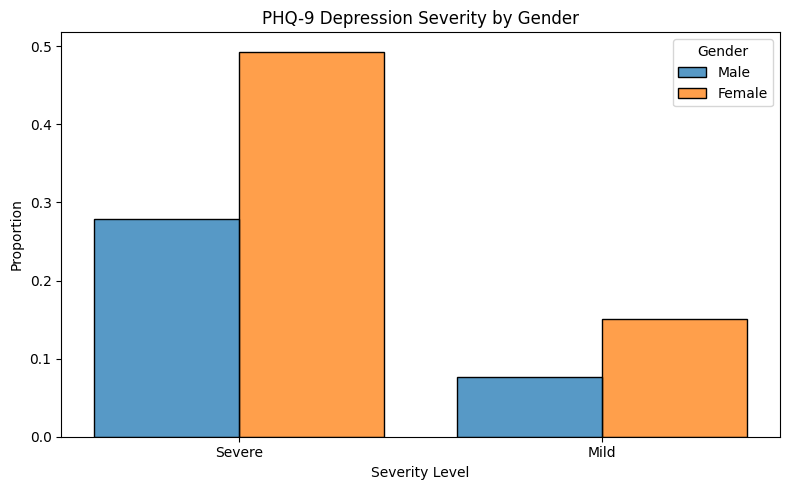

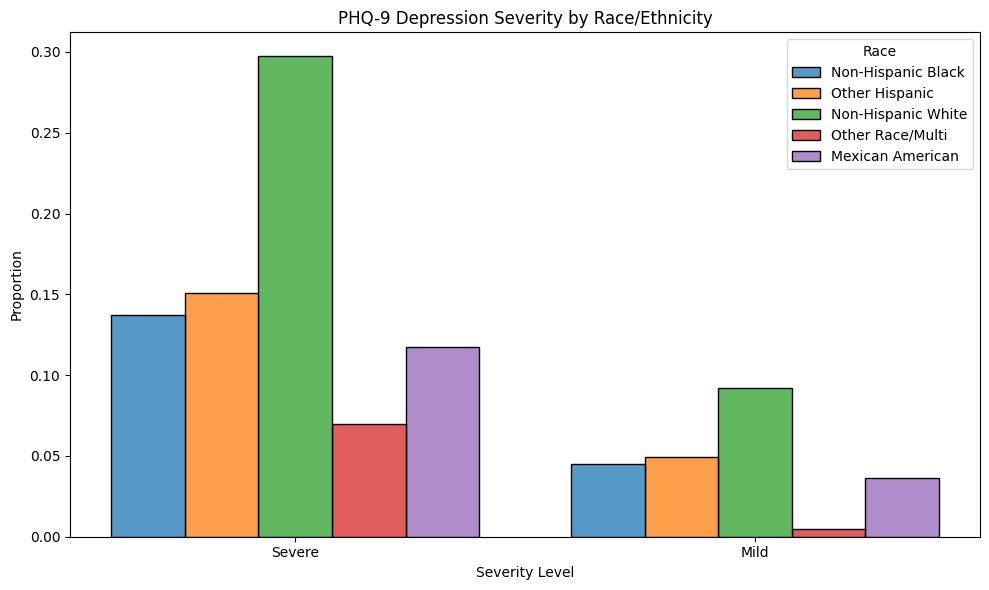

In [ ]:
# Gender bias plot
plt.figure(figsize=(8, 5))
sns.histplot(data=phq_df, x="PHQ9_Level", hue="Gender", multiple="dodge", stat="probability", shrink=0.8)
plt.title("PHQ-9 Depression Severity by Gender")
plt.xlabel("Severity Level")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

# Race bias plot
plt.figure(figsize=(10, 6))
sns.histplot(data=phq_df, x="PHQ9_Level", hue="Race", multiple="dodge", stat="probability", shrink=0.8)
plt.title("PHQ-9 Depression Severity by Race/Ethnicity")
plt.xlabel("Severity Level")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
custom_palette = {
    "None": "#4e79a7",
    "Mild": "#f28e2c",
    "Severe": "#e15759"
}


<ipython-input-25-a20d11d927e4>:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

<ipython-input-25-a20d11d927e4>:17: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



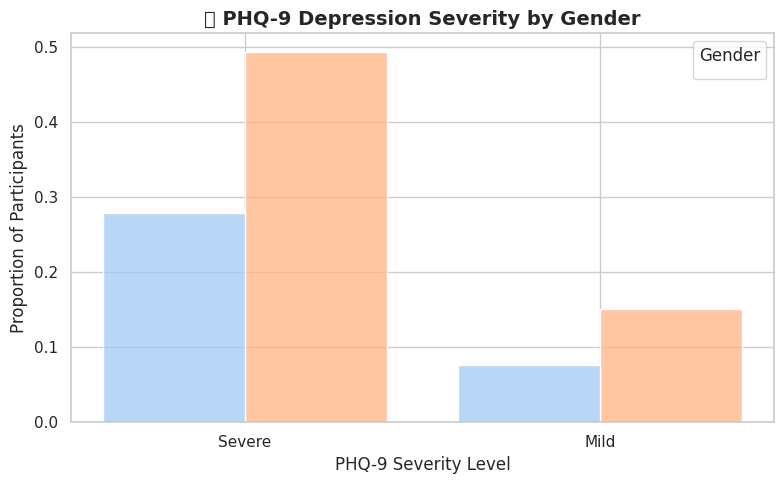

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=phq_df,
    x="PHQ9_Level",
    hue="Gender",
    palette="pastel",
    multiple="dodge",
    stat="probability",
    shrink=0.8
)
plt.title("📊 PHQ-9 Depression Severity by Gender", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level", fontsize=12)
plt.ylabel("Proportion of Participants", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Gender", title_fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-26-abf1570d0a82>:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

<ipython-input-26-abf1570d0a82>:17: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



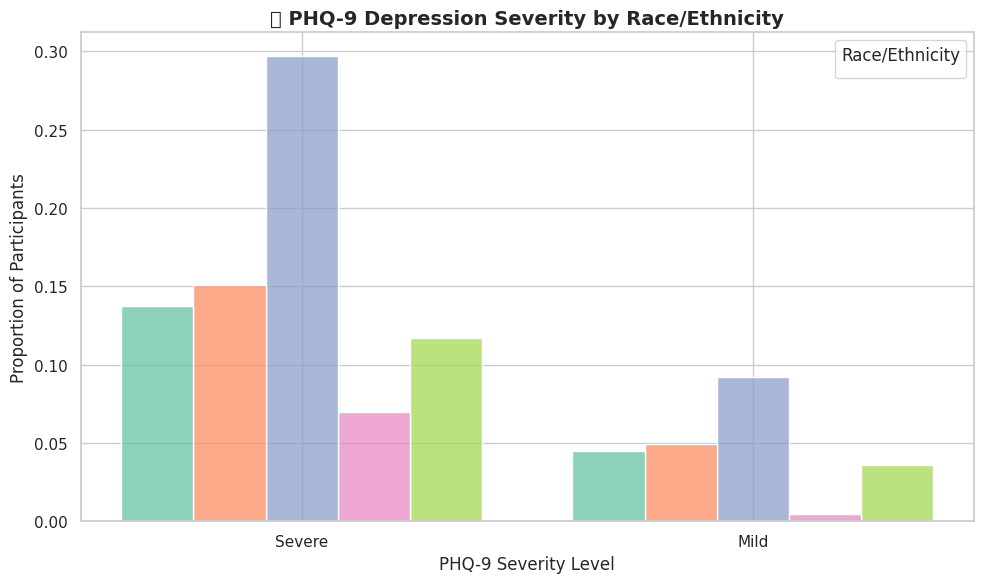

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=phq_df,
    x="PHQ9_Level",
    hue="Race",
    multiple="dodge",
    stat="probability",
    shrink=0.8,
    palette="Set2"
)
plt.title("📊 PHQ-9 Depression Severity by Race/Ethnicity", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level", fontsize=12)
plt.ylabel("Proportion of Participants", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Race/Ethnicity", title_fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-27-41fe1d4cf21f>:8: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



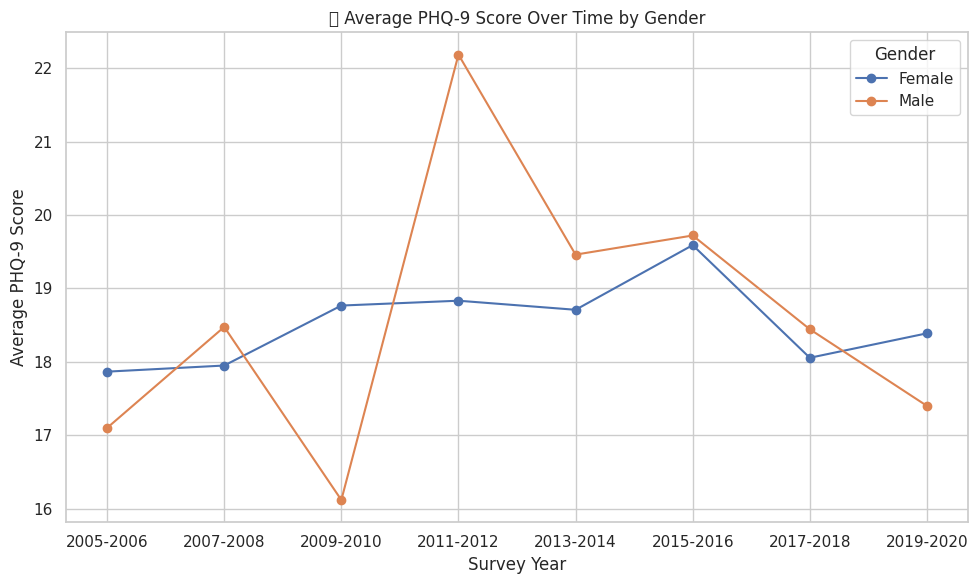

In [ ]:
# Example: Mean PHQ-9 score by Gender and Year
trend = phq_df.groupby(["Year", "Gender"])["PHQ9_TOTAL"].mean().unstack()
trend.plot(marker='o', figsize=(10, 6))
plt.title("📊 Average PHQ-9 Score Over Time by Gender")
plt.ylabel("Average PHQ-9 Score")
plt.xlabel("Survey Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Contingency table: PHQ9_Level vs Gender
table = pd.crosstab(phq_df["PHQ9_Level"], phq_df["Gender"])
chi2, p, _, _ = chi2_contingency(table)

print("Chi-square test (PHQ9 Level vs Gender)")
print("Chi2 statistic:", chi2)
print("p-value:", p)


Chi-square test (PHQ9 Level vs Gender)
Chi2 statistic: 0.11617275915650978
p-value: 0.7332230932141872


<ipython-input-29-6c0aa8cdf41b>:7: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



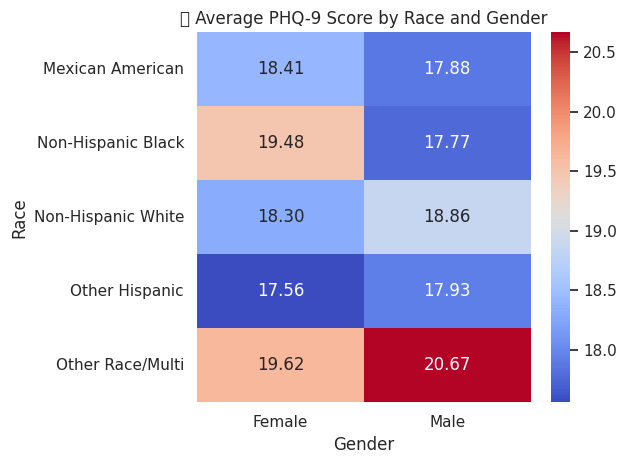

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_data = pd.crosstab(phq_df["Race"], phq_df["Gender"], values=phq_df["PHQ9_TOTAL"], aggfunc='mean')
sns.heatmap(heat_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Average PHQ-9 Score by Race and Gender")
plt.tight_layout()
plt.show()


<ipython-input-30-4df853025c65>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




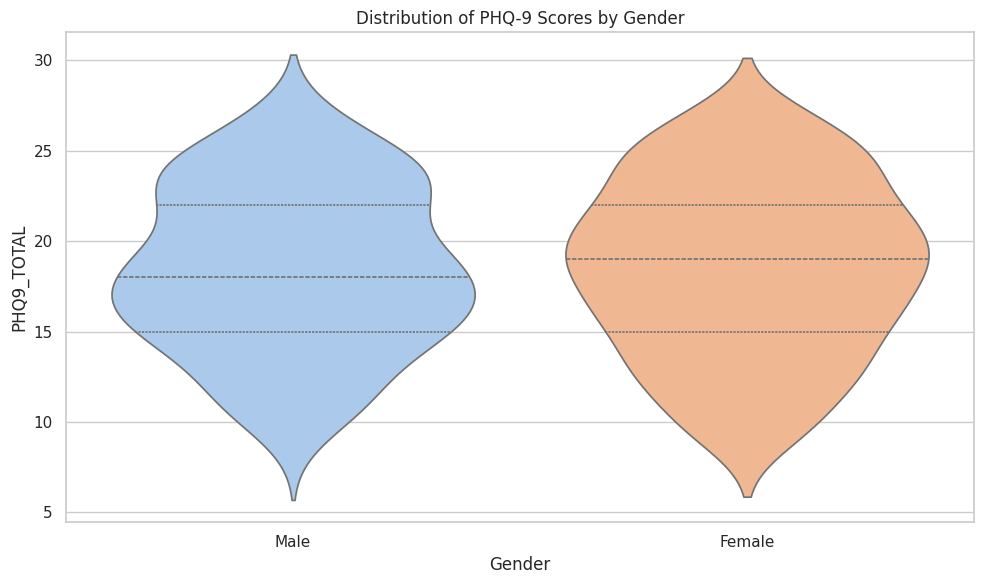

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=phq_df, x="Gender", y="PHQ9_TOTAL", inner="quartile", palette="pastel")
plt.title("Distribution of PHQ-9 Scores by Gender")
plt.tight_layout()
plt.show()


In [ ]:
phq_df["High_Depression"] = (phq_df["PHQ9_TOTAL"] >= 10).astype(int)

# Encode Gender and Race
phq_df["Gender_Code"] = phq_df["Gender"].map({"Male": 0, "Female": 1})
phq_df["Race_Code"] = phq_df["Race"].astype("category").cat.codes

import statsmodels.api as sm

X = phq_df[["Gender_Code", "Race_Code"]]
X = sm.add_constant(X)
y = phq_df["High_Depression"]

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.120883
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        High_Depression   No. Observations:                  444
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                            2
Date:                Wed, 07 May 2025   Pseudo R-squ.:                 0.02711
Time:                        01:24:55   Log-Likelihood:                -53.672
converged:                       True   LL-Null:                       -55.167
Covariance Type:            nonrobust   LLR p-value:                    0.2242
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9663      0.815      4.865      0.000       2.368       5.564
Gender_Code    -1.0574    

<ipython-input-32-ca260e7bad8f>:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

<ipython-input-32-ca260e7bad8f>:17: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



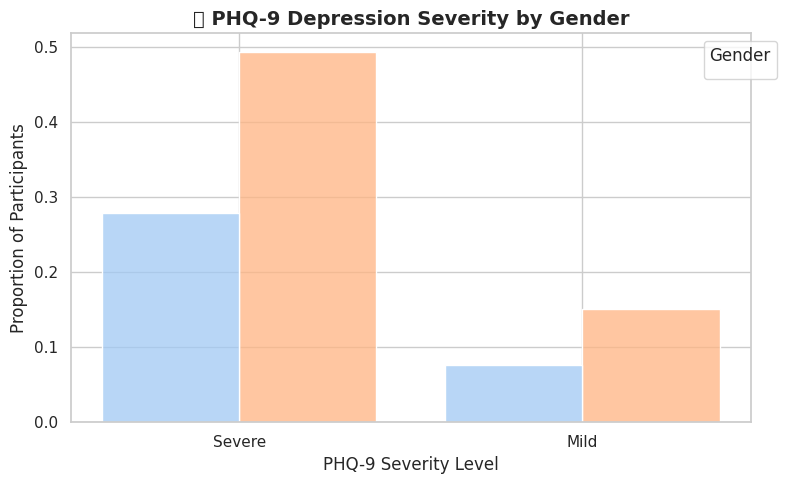

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=phq_df,
    x="PHQ9_Level",
    hue="Gender",
    palette="pastel",
    multiple="dodge",
    stat="probability",
    shrink=0.8
)
plt.title("📊 PHQ-9 Depression Severity by Gender", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level", fontsize=12)
plt.ylabel("Proportion of Participants", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Gender", title_fontsize=12, loc="upper right", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


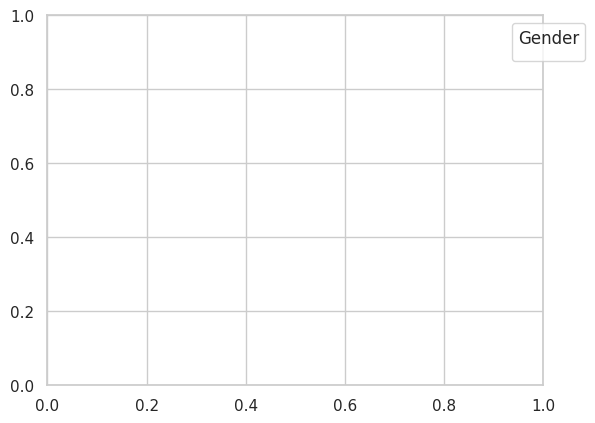

In [ ]:
# Ensure this is in your plotting code
plt.legend(title="Gender", title_fontsize=12, labels=["Male", "Female"], loc="upper right", bbox_to_anchor=(1.1, 1))


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel("/content/demo_all_years.xlsx")  # Replace with your actual filename


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Excel file
df = pd.read_excel("demo_all_years.xlsx")

# Step 2: Define PHQ-9 columns
phq9_cols = [f"DPQ0{i}" for i in range(10, 100, 10)]

# Step 3: Keep only rows with all PHQ-9 values between 0 and 3
for col in phq9_cols:
    df = df[df[col].isin([0, 1, 2, 3])]

# Step 4: Compute PHQ-9 total score
df["PHQ9_TOTAL"] = df[phq9_cols].sum(axis=1)

# Step 5: Categorize PHQ-9 into 3 levels (None, Mild, Severe)
def categorize(score):
    if score <= 4:
        return "None"
    elif score <= 14:
        return "Mild"
    else:
        return "Severe"

df["PHQ9_Level"] = df["PHQ9_TOTAL"].apply(categorize)

# Step 6: Map gender and race labels
df["Gender"] = df["RIAGENDR"].map({1: "Male", 2: "Female"})

race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race/Multi"
}
df["Race"] = df["RIDRETH1"].map(race_map)


KeyError: 'DPQ010'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the loaded DataFrame
df = pd.read_excel(".   /content/demo_all_years.xlsx/mnt/data/demo_all_years.xlsx")

# If needed, map severity again (optional — skip if already categorized)
def simplify(score):
    if score <= 4:
        return "None"
    elif score <= 14:
        return "Mild"
    else:
        return "Severe"

df["PHQ9_Level"] = df["PHQ9_Score"].apply(simplify)

# ✅ Plot 1: PHQ-9 Severity by Gender
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="PHQ9_Level", hue="Gender", multiple="dodge", stat="probability", shrink=0.8, palette="pastel")
plt.title("PHQ-9 Depression Severity by Gender", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level")
plt.ylabel("Proportion of Participants")
plt.legend(title="Gender", title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

# ✅ Plot 2: PHQ-9 Severity by Race
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PHQ9_Level", hue="Race", multiple="dodge", stat="probability", shrink=0.8, palette="Set2")
plt.title("PHQ-9 Depression Severity by Race/Ethnicity", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level")
plt.ylabel("Proportion of Participants")
plt.legend(title="Race/Ethnicity", title_fontsize=12, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/demo_all_years.xlsx'

<ipython-input-5-4051d8d032f6>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender", title_fontsize=12, loc="upper right")


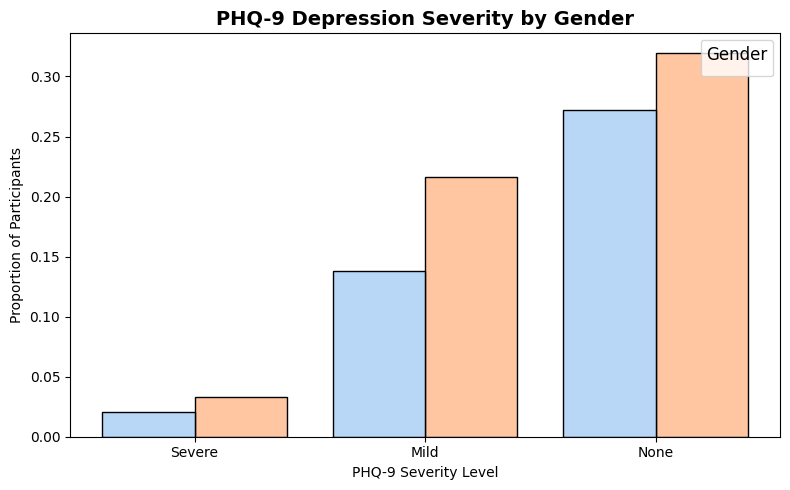

<ipython-input-5-4051d8d032f6>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Race/Ethnicity", title_fontsize=12, loc="upper right", bbox_to_anchor=(1.2, 1))


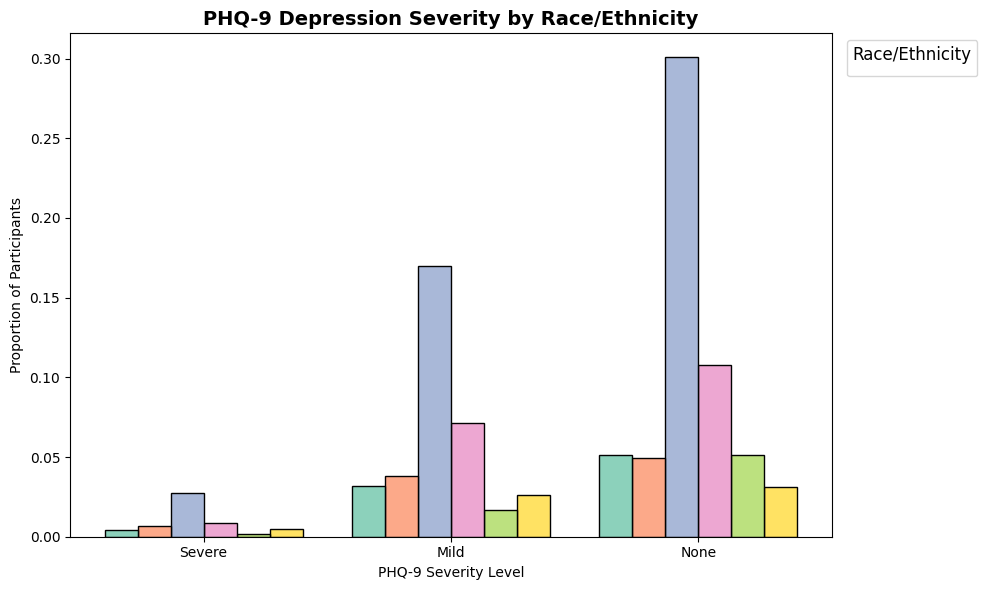

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Excel file from your provided path
df = pd.read_excel("/content/demo_all_years.xlsx")

# Step 2: Categorize PHQ-9 Score into 3 severity levels
def simplify(score):
    if score <= 4:
        return "None"
    elif score <= 14:
        return "Mild"
    else:
        return "Severe"

df["PHQ9_Level"] = df["PHQ9_Score"].apply(simplify)

# Step 3: Plot PHQ-9 Severity by Gender
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="PHQ9_Level", hue="Gender", multiple="dodge",
             stat="probability", shrink=0.8, palette="pastel")
plt.title("PHQ-9 Depression Severity by Gender", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level")
plt.ylabel("Proportion of Participants")
plt.legend(title="Gender", title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

# Step 4: Plot PHQ-9 Severity by Race
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PHQ9_Level", hue="Race", multiple="dodge",
             stat="probability", shrink=0.8, palette="Set2")
plt.title("PHQ-9 Depression Severity by Race/Ethnicity", fontsize=14, weight="bold")
plt.xlabel("PHQ-9 Severity Level")
plt.ylabel("Proportion of Participants")
plt.legend(title="Race/Ethnicity", title_fontsize=12, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


<ipython-input-6-906d50ce4438>:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


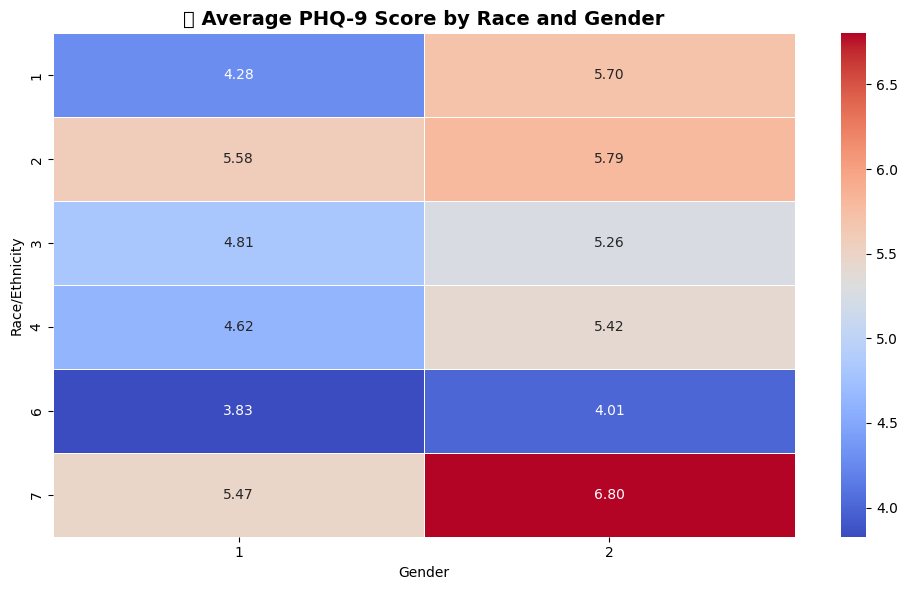

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the data (if not already loaded)
df = pd.read_excel("/content/demo_all_years.xlsx")

# Step 2: Pivot table of average PHQ-9 score by Race and Gender
heat_data = df.pivot_table(
    values="PHQ9_Score",
    index="Race",
    columns="Gender",
    aggfunc="mean"
)

# Step 3: Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📊 Average PHQ-9 Score by Race and Gender", fontsize=14, weight="bold")
plt.xlabel("Gender")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.show()


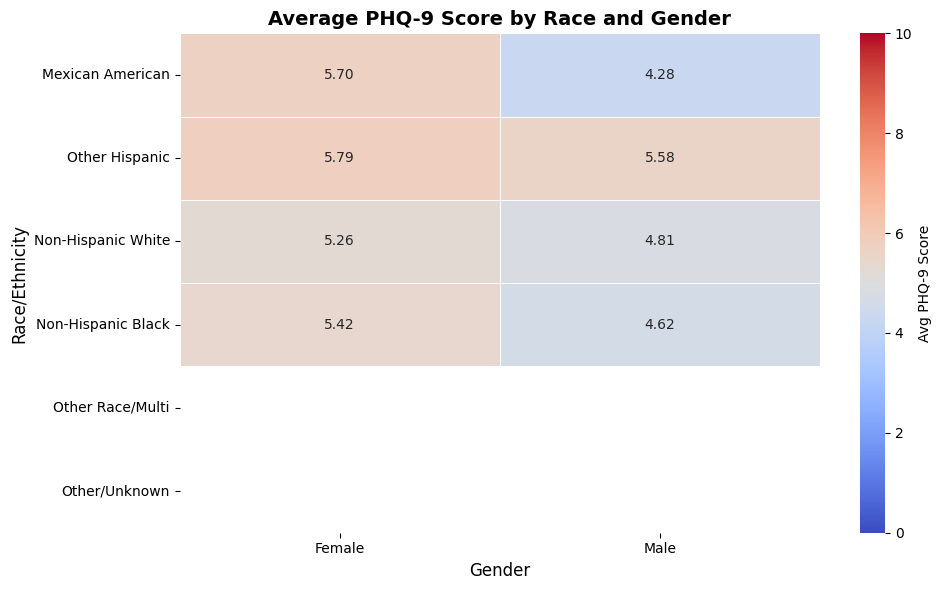

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/demo_all_years.xlsx")

# Map gender and race codes to readable labels
gender_map = {1: "Male", 2: "Female"}
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    6: "Non-Hispanic Asian",
    7: "Other/Multiracial"
}



df["Gender_Label"] = df["Gender"].map(gender_map)
df["Race_Label"] = df["Race"].map(race_map)

# Create pivot table of mean PHQ-9 scores
heat_data = df.pivot_table(
    values="PHQ9_Score",
    index="Race_Label",
    columns="Gender_Label",
    aggfunc="mean"
).round(2)

# Define desired row order
race_order = [
    "Mexican American",
    "Other Hispanic",
    "Non-Hispanic White",
    "Non-Hispanic Black",
    "Other Race/Multi",
    "Other/Unknown"
]
heat_data = heat_data.reindex(race_order)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=0, vmax=10,
    cbar_kws={"label": "Avg PHQ-9 Score"}
)
plt.title("Average PHQ-9 Score by Race and Gender", fontsize=14, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Race/Ethnicity", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



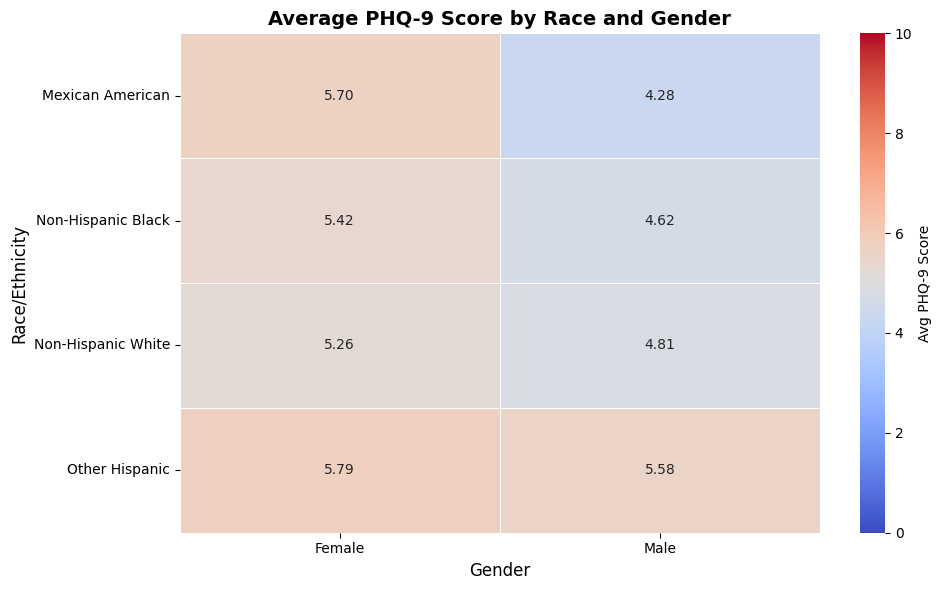

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("/content/demo_all_years.xlsx")

# Clean race/gender mapping
gender_map = {1: "Male", 2: "Female"}
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black"
    # REMOVE 6 and 7 since they don't exist in your dataset
}

df["Gender_Label"] = df["Gender"].map(gender_map)
df["Race_Label"] = df["Race"].map(race_map)

# Drop rows with missing mappings
df = df.dropna(subset=["Race_Label", "Gender_Label", "PHQ9_Score"])

# Pivot table of average PHQ-9 score
heat_data = df.pivot_table(
    values="PHQ9_Score",
    index="Race_Label",
    columns="Gender_Label",
    aggfunc="mean"
).round(2)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0, vmax=10,
    linewidths=0.5,
    cbar_kws={"label": "Avg PHQ-9 Score"}
)
plt.title("Average PHQ-9 Score by Race and Gender", fontsize=14, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Race/Ethnicity", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


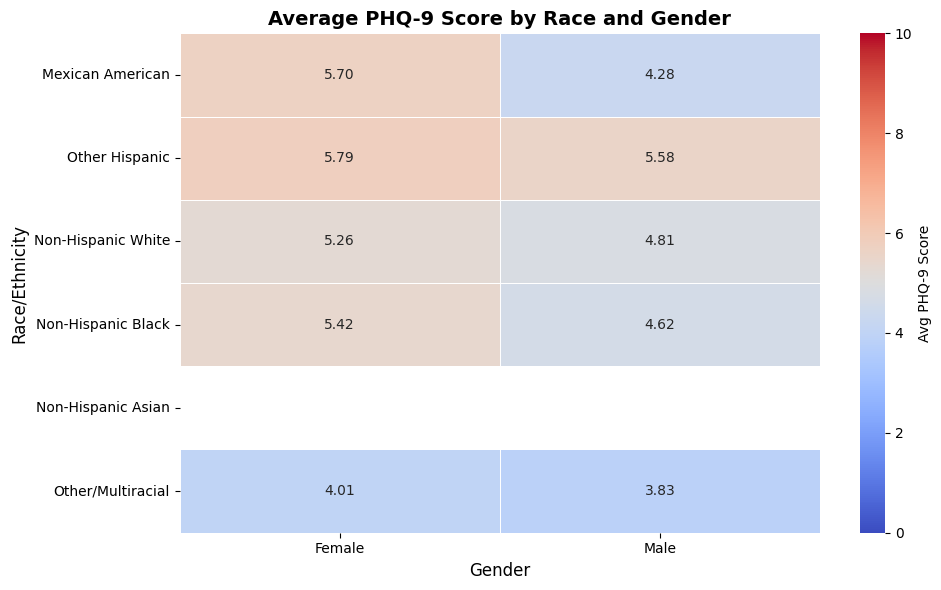

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load data
df = pd.read_excel("/content/demo_all_years.xlsx")

# Apply correct label mapping
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Non-Hispanic Asian",
    6: "Other/Multiracial"
}
gender_map = {1: "Male", 2: "Female"}

df["Race_Label"] = df["Race"].map(race_map)
df["Gender_Label"] = df["Gender"].map(gender_map)

# Drop rows missing any label or score
df = df.dropna(subset=["Race_Label", "Gender_Label", "PHQ9_Score"])

# Pivot for heatmap
heat_data = df.pivot_table(
    values="PHQ9_Score",
    index="Race_Label",
    columns="Gender_Label",
    aggfunc="mean"
).round(2)

# Reorder rows for clarity
race_order = [
    "Mexican American", "Other Hispanic", "Non-Hispanic White",
    "Non-Hispanic Black", "Non-Hispanic Asian", "Other/Multiracial"
]
heat_data = heat_data.reindex(race_order)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0, vmax=10,
    linewidths=0.5,
    cbar_kws={"label": "Avg PHQ-9 Score"}
)
plt.title("Average PHQ-9 Score by Race and Gender", fontsize=14, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Race/Ethnicity", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load your Excel file (update path as needed)
df = pd.read_excel("/content/demo_all_years.xlsx")

# 1. View first few rows
print("🔹 Preview of data:")
print(df.head())

# 2. Column names and types
print("\n🔹 Column names and data types:")
print(df.dtypes)

# 3. Summary of non-null values
print("\n🔹 Non-null value counts:")
print(df.info())

# 4. Unique values in key columns
print("\n🔹 Unique values in Gender and Race:")
print("Gender:", df['Gender'].unique())
print("Race:", df['Race'].unique())

# 5. Summary statistics
print("\n🔹 Summary statistics:")
print(df.describe(include='all'))


🔹 Preview of data:
   Unnamed: 0    SEQN  Age  Gender  Race  MaritalStatus  IncomeRatio  \
0       24303  109273   36       1     3              3         0.83   
1       24305  109282   76       1     3              1         3.61   
2       24308  109290   68       2     4              2         5.00   
3       24310  109292   58       1     2              2         1.60   
4       24311  109293   44       1     3              3         0.02   

   EducationLevel  PHQ9_Score  Depression_Label       Year  
0               4          15                 1  2017-2020  
1               5           5                 0  2017-2020  
2               5           2                 0  2017-2020  
3               3           8                 0  2017-2020  
4               3           3                 0  2017-2020  

🔹 Column names and data types:
Unnamed: 0            int64
SEQN                  int64
Age                   int64
Gender                int64
Race                  int64
MaritalSta

In [ ]:
# Drop any rows with at least one NaN
df_clean = df.dropna()

# Optional: Confirm shape after dropping
print(f"Original shape: {df.shape}")
print(f"New shape after dropping NaNs: {df_clean.shape}")



Original shape: (8045, 11)
New shape after dropping NaNs: (8045, 11)


In [ ]:
# Only drop rows where specific columns (e.g., PHQ9_Score) are missing
df_clean = df.dropna(subset=["PHQ9_Score", "Gender", "Race"])


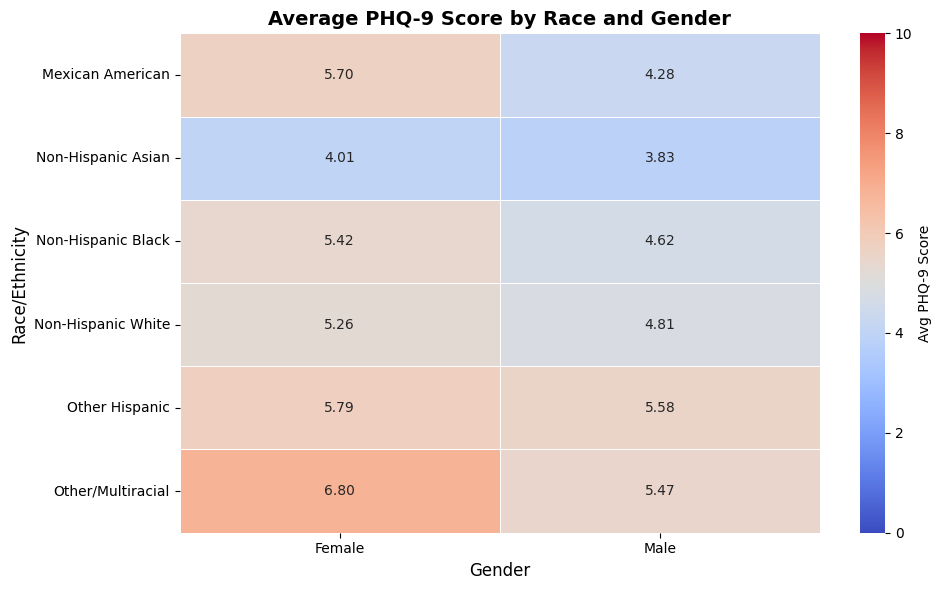

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Map race and gender codes
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    6: "Non-Hispanic Asian",
    7: "Other/Multiracial"
}

gender_map = {
    1: "Male",
    2: "Female"
}

df_clean["Race_Label"] = df_clean["Race"].map(race_map)
df_clean["Gender_Label"] = df_clean["Gender"].map(gender_map)

# Step 2: Create pivot table
heat_data = df_clean.pivot_table(
    values="PHQ9_Score",
    index="Race_Label",
    columns="Gender_Label",
    aggfunc="mean"
).round(2)

# Step 3: Drop rows with all missing values
heat_data = heat_data.dropna(how='all')

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0, vmax=10,
    linewidths=0.5,
    cbar_kws={"label": "Avg PHQ-9 Score"}
)
plt.title("Average PHQ-9 Score by Race and Gender", fontsize=14, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Race/Ethnicity", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('/mnt/data/image.png')


FileNotFoundError: Cannot find file: /mnt/data/image.png

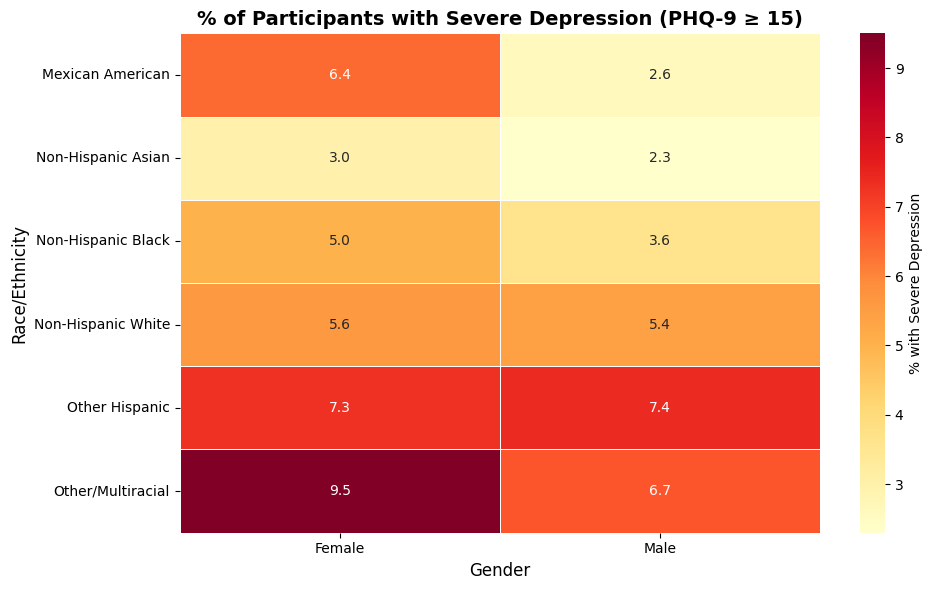

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define mappings again
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    6: "Non-Hispanic Asian",
    7: "Other/Multiracial"
}

gender_map = {
    1: "Male",
    2: "Female"
}

# Add labeled columns
df_clean["Race_Label"] = df_clean["Race"].map(race_map)
df_clean["Gender_Label"] = df_clean["Gender"].map(gender_map)

# Define severe depression: PHQ-9 score ≥ 15
df_clean["Severe"] = df_clean["PHQ9_Score"] >= 15

# Create a pivot of % severe = (sum severe) / (count total)
severe_rate = df_clean.pivot_table(
    values="Severe",
    index="Race_Label",
    columns="Gender_Label",
    aggfunc="mean"
).round(3) * 100  # convert to %

# Drop rows with no data
severe_rate = severe_rate.dropna(how="all")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    severe_rate,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={"label": "% with Severe Depression"}
)
plt.title("% of Participants with Severe Depression (PHQ-9 ≥ 15)", fontsize=14, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Race/Ethnicity", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
